<img src="https://github.com/PKhosravi-CityTech/LightCnnRad/raw/main/Images/BioMindLogo.png" alt="BioMind AI Lab Logo" width="150" height="150" align="left" style="margin-bottom: 40px;"> **Repository Developed by Pegah Khosravi, Principal Investigator of the BioMind AI Lab**

Welcome to this repository! This notebook is designed to provide hands-on experience and foundational knowledge in machine learning. It is part of our journey to explore key ML concepts, algorithms, and applications. Whether you're a PhD student, or a master's student, this repository aims to support your learning goals and encourage critical thinking about machine learning systems.


# **Week 11: Transformers & LLMs**

In this session, we will cover:
1. Limitations of RNNs and the motivation behind Transformers.
2. Self-Attention and how it powers modern deep learning models.
3. Architecture and purpose of BERT (Bidirectional Encoder Representations from Transformers).
4. Build and train an emotion classification model using DistilBERT.
5. Basics of GPT (Generative Pre-trained Transformer) models.
6. How to fine-tune pre-trained Transformers (like BERT) on custom tasks.
7. Prompt Engineering — how to design inputs to guide LLMs effectively.
8. LLM Deployment & QA App (QueryMate demo)


# Limitations of RNNs and the Motivation Behind Transformers

In the early days of deep learning for sequential data, Recurrent Neural Networks (RNNs) were the standard architecture. RNNs were designed to handle sequences by maintaining a hidden state that is updated step-by-step as new inputs arrive. This made them a natural fit for tasks like language modeling, machine translation, and speech recognition.

However, RNNs suffer from several key limitations:

### 1. Sequential Computation
RNNs process inputs one at a time. Each step must wait for the previous step to complete. This sequential nature prevents parallelization during training and inference, making RNNs slow and inefficient on long sequences.

### 2. Difficulty Learning Long-Range Dependencies
Although theoretically RNNs can capture information from far back in a sequence, in practice they struggle. During backpropagation, gradients can vanish (become extremely small) or explode (become extremely large), making it hard to learn dependencies over long distances. Techniques like LSTM and GRU units helped alleviate but did not fully solve this problem.

### 3. Memory Bottleneck
At each time step, the RNN must compress all past information into a single hidden state vector. This bottleneck limits the model's capacity to remember rich details over time.

### 4. Biased Towards Recent Inputs
Because of how information flows through an RNN, the model tends to place more emphasis on recent inputs and "forgets" earlier context, unless specialized mechanisms are introduced.

## The Motivation for Transformers
To address these challenges, Transformers were introduced in the groundbreaking 2017 paper "Attention Is All You Need". Instead of relying on step-by-step recurrence, Transformers use a completely different approach:

### 1. Parallelization
Transformers process all elements of the sequence at once. This allows for full parallelization during training and much faster computation on modern hardware like GPUs and TPUs.

### 2. Self-Attention Mechanism
Transformers use a Self-Attention mechanism that allows every token (word) in the input to directly attend to every other token, regardless of their position in the sequence. This means:
- The model can learn long-range dependencies easily.
- It can focus on relevant parts of the input dynamically.

### 3. Flexible Context
Instead of compressing all past information into a single hidden state, Transformers let each token access information from all other tokens directly. This removes the memory bottleneck of RNNs.

### 4. Scalability
Transformers scale extremely well with larger datasets and larger model sizes, forming the foundation for today's Large Language Models (LLMs) like **BERT**, **GPT**, and **T5**.

In short, Transformers overcome the fundamental bottlenecks of RNNs by:
- Enabling parallel processing.
- Learning global dependencies.
- Avoiding sequential bottlenecks.

These innovations have revolutionized Natural Language Processing (NLP) and enabled the development of powerful systems like ChatGPT, Google BERT, and many others.

# Concept of Self-Attention and How It Powers Modern Deep Learning Models


Self-attention is a mechanism that allows models to weigh the importance of different parts of an input sequence when making predictions about each element. Unlike traditional sequence models like RNNs that process data step-by-step, self-attention processes all elements simultaneously, allowing models to capture long-range dependencies and complex patterns more efficiently.

**Key Concepts:**

- **Contextual Understanding:** In a sentence, not all words are equally important for understanding the meaning of a specific word. Self-attention lets the model dynamically focus on relevant words based on the current word being processed.

- **Parallelization:** Since self-attention considers all words at the same time (instead of sequentially), it enables faster training through parallel computation, unlike RNNs that must process data in order.

- **Long-Range Dependencies:** Traditional RNNs struggle to remember information from far back in a sequence. Self-attention models, like Transformers, can directly link information from distant parts of the input sequence, improving performance on tasks like translation, summarization, and question answering.

### How Self-Attention Works (Concept + Mechanics)

1. **Input Embeddings**
   Each word in a sentence is first turned into a vector representation (embedding), capturing its meaning in context.

2. **Create Queries (Q), Keys (K), and Values (V)**
   These embeddings are linearly transformed into three separate vectors using learned weight matrices:
- **Query (Q):** What this word is asking about.
- **Key (K):** What this word contains.
- **Value (V):** What information this word carries.

3. **Compute Attention Scores**
   Each word compares its Query to all Keys using a dot product:
   $\text{Score} = Q \cdot K^\top$

4. **Scale the Scores**
   To prevent large values that could destabilize training, divide each score by the square root of the Key dimensionality (\$\sqrt{d\_k}\$).

5. **Apply Softmax**
   Convert the scaled scores into probabilities. This determines how much attention each word pays to the others.

6. **Compute Weighted Sum of Values**
   Use the softmax scores to weight the Value vectors and sum them up. This produces a new, context-aware vector for each word.

**Impact on Modern Deep Learning:**

- Self-attention is the core innovation behind Transformers, which power state-of-the-art models like **BERT**, **GPT**, **T5**, and many others.
- It enables models to scale to extremely large datasets and very long sequences.
- It has led to massive advances in NLP tasks like language translation, text generation, summarization, and even cross-modal tasks like image captioning.

### Key Equation for Self-Attention:

$$
\text{Attention}(Q, K, V) = \text{softmax}\left( \frac{QK^T}{\sqrt{d_k}} \right) V
$$

Where:
- $Q$ = Queries
- $K$ = Keys
- $V$ = Values
- $d_k$ = Dimension of the Keys

## self-attention scores

Let's walk through a simple numerical example to better understand how self-attention scores are computed!

Suppose we have a small 3-word input sentence: **"I love NLP"**.

Each word is first converted into an embedding vector. For simplicity, assume:

```
I:    [1, 0, 1]
love: [0, 2, 1]
NLP:  [1, 1, 0]
```

Next, we create three matrices:
- **Query (Q)**
- **Key (K)**
- **Value (V)**

For simplicity, assume $Q = K = V = $ the word embeddings themselves.

### Step 1: Compute Attention Scores

We calculate attention scores by taking the dot product between a word's Query and all Keys.

Example for "I":

- Dot("I", "I") = $1*1 + 0*0 + 1*1 = 2$
- Dot("I", "love") = $1*0 + 0*2 + 1*1 = 1$
- Dot("I", "NLP") = $1*1 + 0*1 + 1*0 = 1$

Thus, "I"'s attention scores are: **[2, 1, 1]**

### Step 2: Apply Softmax

Apply softmax to these scores to convert them into attention weights (they'll sum to 1):

$$
\text{Softmax}([2, 1, 1]) \approx [0.59, 0.20, 0.20]
$$

Meaning "I" mostly attends to itself.

### Step 3: Weighted Sum of Value Vectors

Finally, multiply each Value vector by its attention weight and sum:

$$
\text{Output for "I"} = 0.59 \times [1, 0, 1] + 0.20 \times [0, 2, 1] + 0.20 \times [1, 1, 0]
$$

Compute it step-by-step:

- $0.59 \times [1, 0, 1] = [0.59, 0, 0.59]$
- $0.20 \times [0, 2, 1] = [0, 0.4, 0.2]$
- $0.20 \times [1, 1, 0] = [0.2, 0.2, 0]$

Sum them:

$$
[0.59, 0, 0.59] + [0, 0.4, 0.2] + [0.2, 0.2, 0] = [0.79, 0.6, 0.79]
$$

Thus, the new representation for "I" after self-attention is **[0.79, 0.6, 0.79]**.


You would repeat the same for "love" and "NLP". This is how self-attention lets each word "look" at other words and build richer representations!



## Comparison of ANN, CNN, RNN, and Transformer Architectures


**1. ANN (Artificial Neural Network)**
- **Input:** Numbers or features (like age, salary, etc.)
- **Architecture:**
  - Input Layer
  - Hidden Layers (Linear Layers + Activation Functions)
  - Output Layer
- **Characteristics:**
  - Each neuron connects to every neuron in the next layer (fully connected).
  - Good for basic classification/regression tasks.
  - Does not handle sequences or spatial structure.

**Diagram:**
```
[Input Features] -> [Linear Layer + Activation] -> [Linear Layer + Activation] -> [Output]

```


**2. CNN (Convolutional Neural Network)**
- **Input:** Images (or spatial data like 2D/3D grids)
- **Architecture:**
  - Input Layer
  - Convolutional Layers (extract features)
  - Pooling Layers (reduce size)
  - Fully Connected Layers
  - Output Layer
- **Characteristics:**
  - Learns spatial hierarchies (edges, textures, objects).
  - Great for image processing and computer vision tasks.

**Diagram:**
```
[Image Input] -> [Conv Layer + Activation] -> [Pooling Layer] -> [Conv Layer] -> [Flatten] -> [Fully Connected] -> [Output]

```


**3. RNN (Recurrent Neural Network)**
- **Input:** Sequences (text, time series, etc.)
- **Architecture:**
  - Input Layer
  - Recurrent Layer (shares parameters across time)
  - Fully Connected Layer
  - Output Layer
- **Characteristics:**
  - Remembers information through hidden states.
  - Good for sequence modeling but struggles with long sequences (vanishing gradients).

**Diagram:**
```
[Input t1] -> [Hidden State]
[Input t2] -> [Hidden State]
[Input t3] -> [Hidden State] -> [Output]

```


**4. Transformer**
- **Input:** Sequences (mostly text, but also images, audio, etc.)
- **Architecture:**
  - Input Embeddings (Tokens + Positional Encoding)
  - Encoder/Decoder Blocks
    - Multi-Head Attention
    - Feed Forward Layers
    - Layer Normalization
  - Output Layer
- **Characteristics:**
  - Uses Attention to capture relationships between all elements.
  - Can process sequences in parallel (unlike RNNs).
  - Best for complex language tasks, translation, summarization.

**Diagram:**
```
[Input Tokens] -> [Embedding + Positional Encoding] -> [Attention Blocks] -> [Feed Forward Layers] -> [Output]

```


**Summary Table:**

| Model | Best For | Key Feature |
|:------|:---------|:------------|
| ANN | Basic structured data | Fully connected layers |
| CNN | Images and spatial data | Convolution + pooling |
| RNN | Sequence data | Hidden states over time |
| Transformer | Complex sequences (especially language) | Attention mechanism |



**Comparison of CNNs, RNNs, and Transformers**


This table highlights key differences between CNNs, RNNs, and Transformers in terms of computation, scalability, and application focus.


| Aspect                       | Transformers                                                    | CNNs                                                        | RNNs                                                          |
| :--------------------------- | :-------------------------------------------------------------- | :---------------------------------------------------------- | :------------------------------------------------------------ |
| **Computation Cost**         | $O(N^2)$ (due to full self-attention across all token pairs)  | $O(N)$ (local operations on neighboring elements)         | $O(N)$ (sequential processing across time steps)            |
| **Parallelism**              | Very high (self-attention is parallelizable)                    | High (convolutions can run in parallel)                     | Low (sequential nature makes parallelism hard)                |
| **Receptive Field**          | Global (every token attends to all others)                      | Local (increased with deeper layers)                        | Expands with time (past context only)                         |
| **Scaling with Input Size**  | Poor (quadratic time/memory)                                    | Good (linear scaling)                                       | Good (linear scaling, but slow)                               |
| **Memory Usage**             | High (due to attention matrix)                                  | Moderate                                                    | Low to Moderate                                               |
| **Typical Use**              | Language modeling, long-range dependencies, vision transformers | Image classification, object detection, text classification | Sequence modeling, speech recognition, time-series prediction |
| **Context Awareness**        | Full bidirectional (in encoder models)                          | Limited to local features unless stacked                    | Unidirectional (standard RNN), bidirectional in BiRNNs        |
| **Training Efficiency**      | Fast with GPU and batching                                      | Fast and efficient                                          | Slower, prone to vanishing/exploding gradients                |
| **Positional Understanding** | Requires positional encodings                                   | Implicit through kernel locality                            | Inherent (through time-step recurrence)                       |


Although Transformers are not inherently sequential like RNNs or LSTMs, they are well-suited for video analysis tasks due to their ability to model long-range dependencies using self-attention. Instead of processing frames one at a time, Transformers attend to all frames simultaneously while preserving temporal order through positional or temporal embeddings. This allows them to capture both spatial and temporal relationships across video frames. Modern video analysis models like TimeSformer and ViViT demonstrate that Transformers can outperform traditional sequential models by leveraging global context more effectively.

In this section, we demonstrate a full deep learning pipeline using a Transformer model for a text classification task. We use the UCI SMS Spam Collection dataset, where the goal is to classify messages as 'spam' or 'ham' (not spam). The code covers installing libraries, loading and preprocessing the data, tokenizing the text with a pretrained DistilBERT model, defining a custom PyTorch dataset, building a Transformer-based classifier, training the model over several epochs, evaluating the model's performance, and visualizing random predictions.

In [ ]:
# Deep Learning Example with Transformers on UCI Dataset

# Step 1: Install Libraries (Uncomment and run if needed)
#!pip install -q transformers datasets scikit-learn

# Step 2: Import Libraries
import torch  # For tensor operations and deep learning
from torch.utils.data import DataLoader, Dataset  # For creating dataset and data loader
from torch import nn  # For neural network building blocks
from transformers import AutoTokenizer, AutoModel, get_scheduler  # For pretrained models and learning rate scheduler
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
from sklearn.model_selection import train_test_split  # For splitting data into training and testing
from sklearn.preprocessing import LabelEncoder  # For converting labels to numbers
from tqdm.notebook import tqdm  # For progress bars

# Step 3: Load a UCI Dataset
# Example: We'll use the "SMS Spam Collection" dataset
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"  # Dataset URL
data = pd.read_csv(url, sep='\t', header=None, names=['label', 'text'])  # Read the dataset into a dataframe

# Step 4: Preprocessing
le = LabelEncoder()  # Initialize label encoder
data['label'] = le.fit_transform(data['label'])  # Encode labels: spam = 1, ham = 0

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data['text'].tolist(), data['label'].tolist(),
    test_size=0.2, random_state=42
)

# Step 5: Tokenization
model_name = "distilbert-base-uncased"  # Choose a pretrained transformer model
tokenizer = AutoTokenizer.from_pretrained(model_name)  # Load corresponding tokenizer

# Create a custom dataset class for tokenized text
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts  # List of input texts
        self.labels = labels  # List of labels
        self.tokenizer = tokenizer  # Tokenizer object
        self.max_len = max_len  # Maximum token length

    def __len__(self):
        return len(self.texts)  # Return number of samples

    def __getitem__(self, idx):
        text = str(self.texts[idx])  # Get the text
        label = self.labels[idx]  # Get the label

        # Tokenize the text
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_len,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),  # Flatten input ids
            'attention_mask': encoding['attention_mask'].flatten(),  # Flatten attention mask
            'labels': torch.tensor(label, dtype=torch.long)  # Label tensor
        }

# Instantiate datasets and dataloaders
train_dataset = TextDataset(X_train, y_train, tokenizer)
test_dataset = TextDataset(X_test, y_test, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)  # Training data loader
test_loader = DataLoader(test_dataset, batch_size=16)  # Test data loader

# Step 6: Model
# Define Transformer-based Classifier
class TransformerClassifier(nn.Module):
    def __init__(self, model_name, num_labels):
        super(TransformerClassifier, self).__init__()
        self.transformer = AutoModel.from_pretrained(model_name)  # Load pretrained transformer
        self.drop = nn.Dropout(p=0.3)  # Dropout layer to prevent overfitting
        self.out = nn.Linear(self.transformer.config.hidden_size, num_labels)  # Linear output layer

    def forward(self, input_ids, attention_mask):
        outputs = self.transformer(input_ids=input_ids, attention_mask=attention_mask)  # Forward pass
        pooled_output = outputs.last_hidden_state[:, 0]  # Extract [CLS] token output
        output = self.drop(pooled_output)  # Apply dropout
        return self.out(output)  # Get final output

# Initialize model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # Use GPU if available
model = TransformerClassifier(model_name, num_labels=2)  # Instantiate the model
model = model.to(device)  # Move model to device (GPU/CPU)

# Optimizer and Scheduler
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)  # AdamW optimizer
num_training_steps = len(train_loader) * 3  # Number of training steps (3 epochs)
lr_scheduler = get_scheduler(
    "linear", optimizer=optimizer,
    num_warmup_steps=0, num_training_steps=num_training_steps
)  # Learning rate scheduler

# Step 7: Training Loop
# Train model for one epoch
def train_one_epoch(model, loader, optimizer, scheduler, device):
    model.train()  # Set model to training mode
    total_loss = 0
    progress_bar = tqdm(loader, desc='Training')  # Progress bar

    for batch in progress_bar:
        optimizer.zero_grad()  # Reset gradients
        input_ids = batch['input_ids'].to(device)  # Input ids to device
        attention_mask = batch['attention_mask'].to(device)  # Attention masks to device
        labels = batch['labels'].to(device)  # Labels to device

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)  # Model output
        loss = nn.CrossEntropyLoss()(outputs, labels)  # Calculate loss
        loss.backward()  # Backpropagate
        optimizer.step()  # Update parameters
        scheduler.step()  # Update learning rate

        total_loss += loss.item()  # Accumulate loss
        progress_bar.set_postfix(loss=loss.item())  # Show current loss

    return total_loss / len(loader)  # Return average loss

# Train for 3 epochs
EPOCHS = 3
for epoch in range(EPOCHS):
    print(f"--- Epoch {epoch+1}/{EPOCHS} ---")
    loss = train_one_epoch(model, train_loader, optimizer, lr_scheduler, device)
    print(f"Epoch {epoch+1} Loss: {loss:.4f}\n")

# Step 8: Evaluation
# Evaluate model performance
def evaluate(model, loader, device):
    model.eval()  # Set model to evaluation mode
    predictions = []
    true_labels = []

    with torch.no_grad():  # No gradient computation during evaluation
        for batch in loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs, dim=1)  # Get predictions

            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    accuracy = np.mean(np.array(predictions) == np.array(true_labels))  # Calculate accuracy
    print(f"Test Accuracy: {accuracy*100:.2f}%")  # Print accuracy

# Run evaluation
evaluate(model, test_loader, device)

In this notebook, the Transformer architecture is applied using a pretrained model — distilbert-base-uncased — via Hugging Face’s transformers library. Rather than training a Transformer from scratch, we use transfer learning: we load a DistilBERT model that has already been trained on a large corpus, and we fine-tune it for the SMS spam classification task. The input texts are tokenized using DistilBERT's tokenizer, which handles splitting text into tokens, adding special tokens (like [CLS]), and padding/truncation.

The TransformerClassifier class wraps the DistilBERT model and adds a dropout layer followed by a linear classification head. Only the [CLS] token's output (i.e., outputs.last_hidden_state[:, 0]) is used — this vector is considered a condensed representation of the entire input sequence. The dropout helps prevent overfitting, and the final linear layer maps the hidden state to two output logits (spam or ham).

During training, the input tensors (input_ids and attention_mask) are passed into the Transformer, and the model's outputs are compared against the true labels using cross-entropy loss. The optimizer and learning rate scheduler help update the weights during fine-tuning. Since the base Transformer is pretrained, only small updates are typically needed to adapt it to the classification task, making training more efficient and requiring less data.

In [ ]:
# Let's visualize some predictions on test data!
import random

id2label = {i: str(i) for i in range(len(set(y_test)))}

# Pick a few random samples
num_samples = 5
sample_indices = random.sample(range(len(test_dataset)), num_samples)

model.eval()

for idx in sample_indices:
    sample = test_dataset[idx]
    input_ids = sample['input_ids'].unsqueeze(0).to(device)
    attention_mask = sample['attention_mask'].unsqueeze(0).to(device)
    label = sample['labels'].item()

    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs  # If outputs are already logits
        pred = torch.argmax(logits, dim=1).item()

    text = X_test[idx]  # original text
    true_label = id2label[label]
    predicted_label = id2label[pred]

    print(f"📝 Text: {text}")
    print(f"✅ True Label: {true_label}")
    print(f"🔮 Predicted Label: {predicted_label}")
    print("-" * 80)


In this section, we combine Convolutional Neural Networks (CNNs) and Transformer blocks to build a hybrid deep learning model for image classification on the CIFAR-10 dataset. First, we use a CNN to extract local visual features from images, then apply a Transformer Encoder to capture global relationships among those features. We train the model to classify images into 10 categories (like airplane, dog, truck, etc.). Finally, we evaluate the model's accuracy on the test set and visualize a few random predictions, highlighting correct and incorrect results in different colors.

In [ ]:
# CNN + Transformer on CIFAR-10

# Install necessary libraries (uncomment if needed)
# !pip install -q torch torchvision tqdm

# Import libraries
import torch  # Main PyTorch library
import torch.nn as nn  # Neural network layers and functions
import torch.optim as optim  # Optimizers
from torch.utils.data import DataLoader  # Data loading utilities
from torchvision import datasets, transforms  # Datasets and transformations
from tqdm import tqdm  # Progress bar

# Set device (GPU if available, else CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 1. Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize images to [-1, 1] range
])

# Download and load the training and test datasets
train_dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

# Create data loaders for batching
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 2. CNN Feature Extractor
class CNNFeatureExtractor(nn.Module):
    def __init__(self):
        super(CNNFeatureExtractor, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),  # First convolution layer
            nn.ReLU(),  # Activation function
            nn.MaxPool2d(2),  # Downsampling
            nn.Conv2d(64, 128, kernel_size=3, padding=1),  # Second convolution layer
            nn.ReLU(),
            nn.MaxPool2d(2)  # More downsampling
        )

    def forward(self, x):
        return self.features(x)  # Extract features from input image

# 3. Transformer Encoder Block
class TransformerBlock(nn.Module):
    def __init__(self, embed_dim, num_heads, ff_dim):
        super(TransformerBlock, self).__init__()
        self.attention = nn.MultiheadAttention(embed_dim, num_heads)  # Self-attention mechanism
        self.feed_forward = nn.Sequential(
            nn.Linear(embed_dim, ff_dim),  # First feed-forward layer
            nn.ReLU(),
            nn.Linear(ff_dim, embed_dim)  # Second feed-forward layer
        )
        self.norm1 = nn.LayerNorm(embed_dim)  # First layer normalization
        self.norm2 = nn.LayerNorm(embed_dim)  # Second layer normalization

    def forward(self, x):
        attn_output, _ = self.attention(x, x, x)  # Apply attention
        x = self.norm1(x + attn_output)  # Add and normalize
        ff_output = self.feed_forward(x)  # Apply feed-forward network
        x = self.norm2(x + ff_output)  # Add and normalize again
        return x  # Return processed features

# 4. Full Model
class CNNTransformerClassifier(nn.Module):
    def __init__(self, num_classes=10):
        super(CNNTransformerClassifier, self).__init__()
        self.cnn = CNNFeatureExtractor()  # CNN feature extractor
        self.flatten = nn.Flatten(2)  # Flatten feature maps into sequences
        self.transformer = TransformerBlock(embed_dim=128, num_heads=4, ff_dim=256)  # Transformer block
        self.fc = nn.Linear(128, num_classes)  # Final classification layer

    def forward(self, x):
        x = self.cnn(x)  # Extract features using CNN
        x = self.flatten(x)  # Flatten to (batch, channels, tokens)
        x = x.permute(2, 0, 1)  # Rearrange to (tokens, batch, embed_dim) for Transformer
        x = self.transformer(x)  # Apply Transformer block
        x = x.mean(dim=0)  # Mean pooling over tokens
        x = self.fc(x)  # Final classification output
        return x

# 5. Train and Evaluate

# Initialize model, loss function, and optimizer
model = CNNTransformerClassifier().to(device)
criterion = nn.CrossEntropyLoss()  # Loss function for classification
optimizer = optim.Adam(model.parameters(), lr=1e-3)  # Adam optimizer

# Training Loop
EPOCHS = 10  # Number of epochs to train
for epoch in range(EPOCHS):
    model.train()  # Set model to training mode
    running_loss = 0  # Track loss
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS}")  # Progress bar

    for inputs, labels in progress_bar:
        inputs, labels = inputs.to(device), labels.to(device)  # Move data to device

        optimizer.zero_grad()  # Reset gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update parameters

        running_loss += loss.item()  # Accumulate loss
        progress_bar.set_postfix({'loss': running_loss / (progress_bar.n + 1)})  # Show current loss

# Evaluation
model.eval()  # Set model to evaluation mode
correct = 0
total = 0

with torch.no_grad():  # No need to calculate gradients during evaluation
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)  # Forward pass
        _, preds = torch.max(outputs, 1)  # Get predicted classes
        correct += (preds == labels).sum().item()  # Count correct predictions
        total += labels.size(0)  # Count total samples

accuracy = correct / total * 100  # Calculate accuracy percentage
print(f"\nTest Accuracy: {accuracy:.2f}%")  # Print test accuracy

This model combines the strengths of CNNs and Transformer architectures for image classification on the CIFAR-10 dataset. The architecture begins with a CNN-based feature extractor, composed of two convolutional layers followed by ReLU activations and max pooling. This CNN is responsible for capturing local patterns in the input images, such as edges, textures, and small shapes.

The output of the CNN is a set of 2D feature maps, which are then flattened along the spatial dimensions to create a sequence suitable for Transformer processing. Each spatial location in the feature map becomes a “token” in the sequence, and the number of channels (128) becomes the embedding dimension. This transforms the image into a format similar to a sequence of word embeddings in NLP tasks.

The Transformer block then models long-range dependencies and global relationships between different spatial locations in the image. It uses multi-head self-attention to let each spatial token attend to all others, and a feed-forward network to refine these interactions. Layer normalization and residual connections are included to stabilize training.

After passing through the Transformer, the sequence of token embeddings is mean-pooled to produce a single vector that summarizes the entire image. This vector is then passed to a final fully connected layer, which outputs class probabilities for CIFAR-10’s 10 categories.

This hybrid design leverages CNNs for local feature extraction and Transformers for global context modeling, enabling the model to understand both fine details and the overall structure of the image.

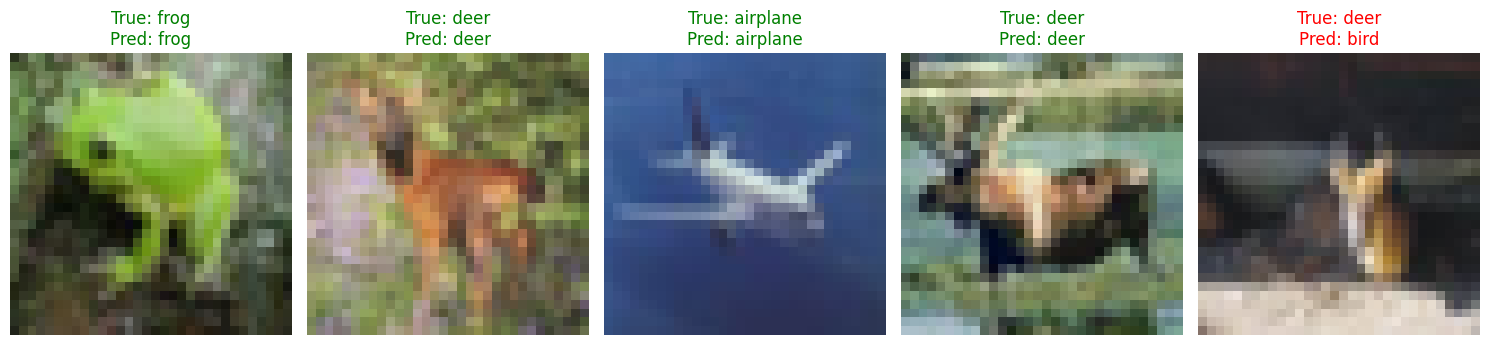

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

# Pick a few random samples
num_samples = 5
model.eval()

plt.figure(figsize=(15, 5))

for i in range(num_samples):
    idx = random.randint(0, len(test_dataset) - 1)
    image, true_label = test_dataset[idx]

    input_tensor = image.unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(input_tensor)
        logits = outputs
        pred = torch.argmax(logits, dim=1).item()

    image = image.permute(1, 2, 0).cpu().numpy()

    # UNDO normalization
    image = (image * 0.5) + 0.5
    image = np.clip(image, 0, 1)

    plt.subplot(1, num_samples, i+1)
    plt.imshow(image)
    title_color = 'green' if pred == true_label else 'red'
    plt.title(f"True: {classes[true_label]}\nPred: {classes[pred]}", color=title_color)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import zipfile
import os

from google.colab import drive
drive.mount('/content/gdrive')


# Path to your zip file
zip_path = "/content/gdrive/MyDrive/ColabNotebooks_PegahKhosravi/CS74020_Spring2025/Colon.zip"

# Directory where you want to extract
unzip_dir = "/content/Colon"

# Unzip only if not already extracted
if not os.path.exists(unzip_dir):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall("/content/")
    print("Unzipped successfully!")
else:
    print("Already unzipped.")


Data Source: https://www.kaggle.com/datasets/francismon/curated-colon-dataset-for-deep-learning

This code implements an image classification pipeline using a Vision Transformer (ViT) model on a custom medical dataset ("Colon"), which includes images across four categories (normal, ulcerative colitis, polyps, esophagitis). First, the dataset is extracted from Google Drive and organized into train, validation, and test sets. Images are resized to 224×224 pixels and normalized to match the input format expected by ViT.

A pre-trained ViT-Base (patch size 16, input size 224) model is loaded from the timm library, and the final classification layer is adjusted to match the number of classes in the dataset. ViT treats each image as a sequence of smaller patches, applies self-attention across these patches, and learns both local and global representations effectively, making it powerful for visual tasks without relying on traditional convolution operations.

The model is fine-tuned on the training data using the Adam optimizer and cross-entropy loss, with real-time validation accuracy reported after each epoch. Finally, the trained model is evaluated on the test set to report final classification accuracy, demonstrating the effectiveness of Transformer architectures for medical image analysis.



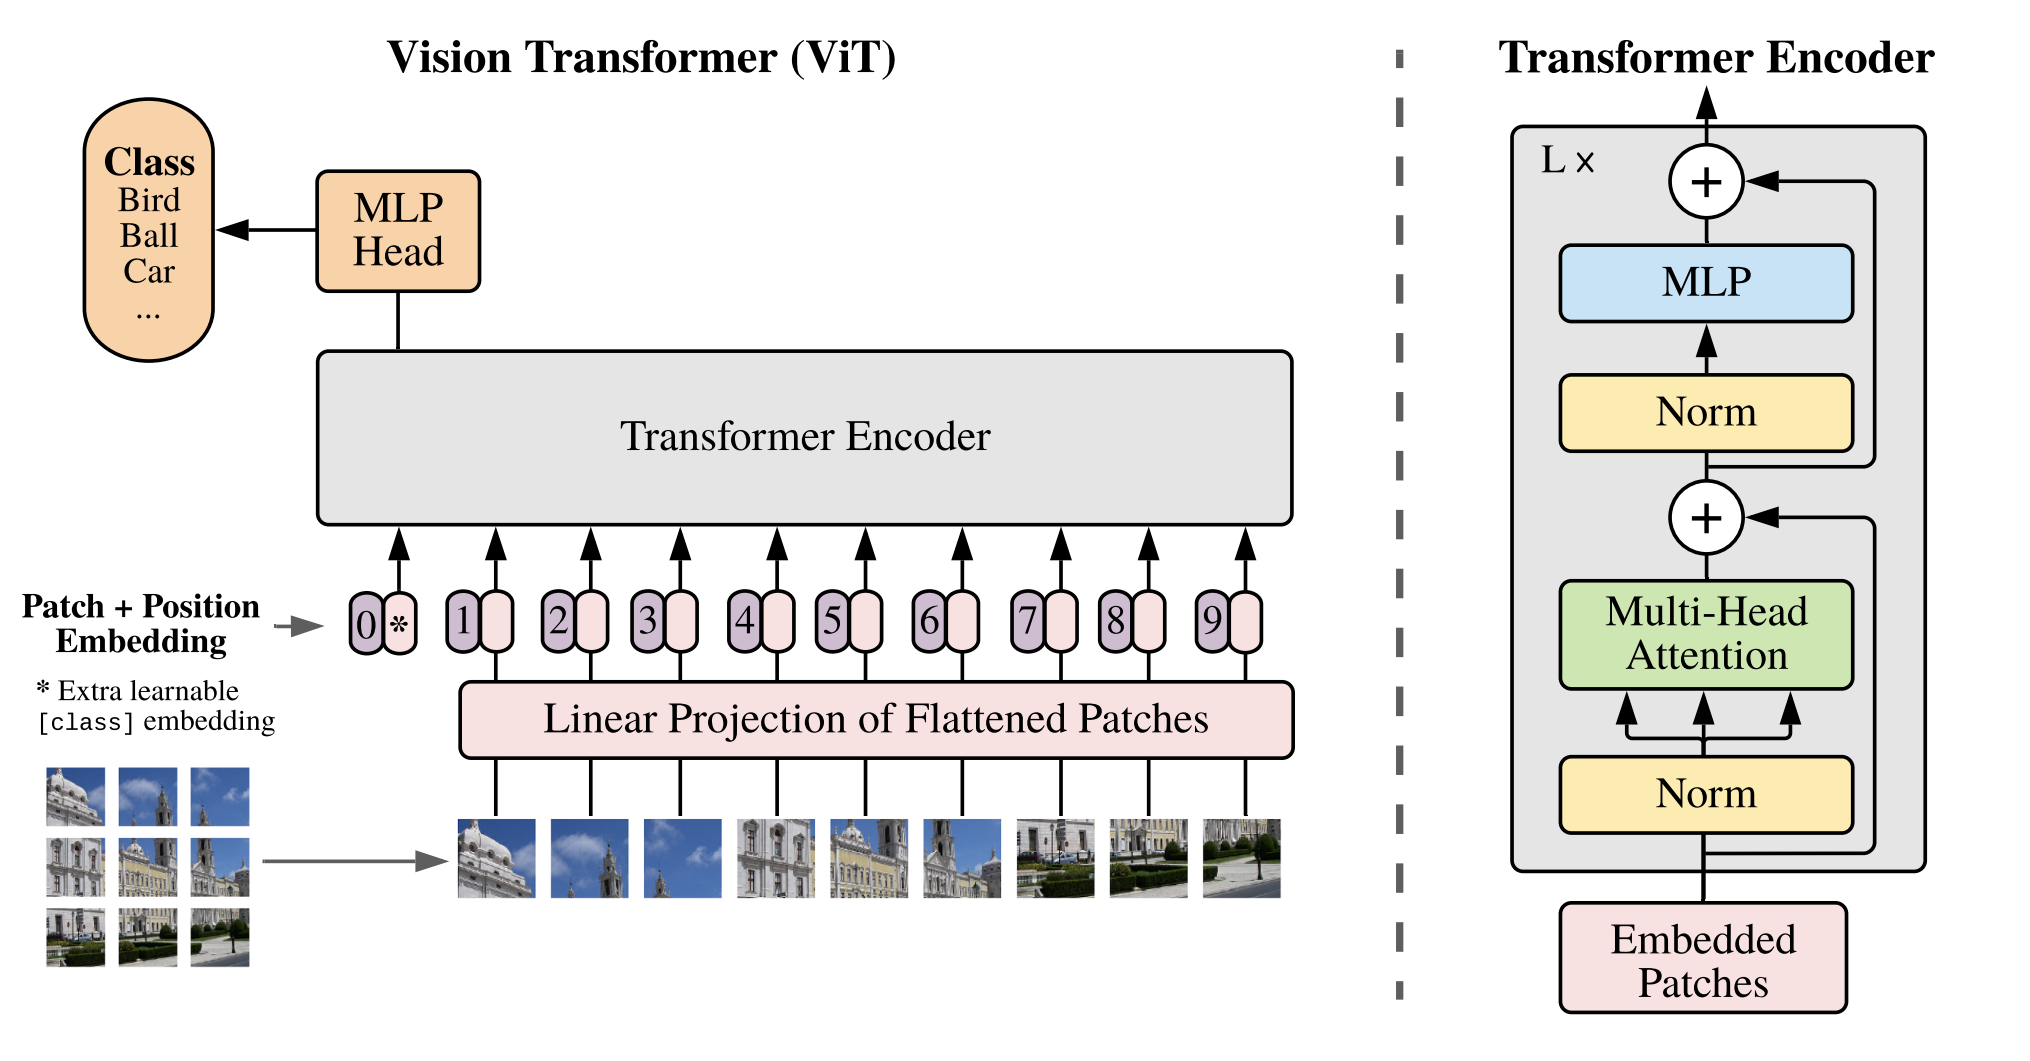

For more detailed information on the Vision Transformer (ViT) architecture, please refer to the original paper: "An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale" by Dosovitskiy et al., 2020 (https://arxiv.org/abs/2010.11929).

In [ ]:
# Install if needed: Huggingface transformers and timm (commented out here for Colab/compatibility)
# !pip install transformers timm

# Import necessary libraries
import torch  # Core PyTorch
import torch.nn as nn  # Neural network components
import torch.optim as optim  # Optimizers
from torchvision import datasets, transforms  # Image datasets and transforms
from torch.utils.data import DataLoader  # Batch loading utilities
from transformers import ViTForImageClassification, ViTFeatureExtractor  # HuggingFace ViT (not used here, optional)
import timm  # For loading pretrained Vision Transformer models
from tqdm import tqdm  # For progress bars
import os  # For directory and file handling

# Set computation device: GPU if available, otherwise CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Set paths to your image datasets
train_dir = '/content/train'  # Training images directory
val_dir = '/content/val'      # Validation images directory
test_dir = '/content/test'    # Test images directory

# Get class names from training directory and count number of classes
class_names = os.listdir(train_dir)
num_classes = len(class_names)
print(f"Classes: {class_names}")  # Display class labels (e.g., ['cat', 'dog'])

# Define image preprocessing transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize all images to 224x224 (required for ViT)
    transforms.ToTensor(),  # Convert PIL image to PyTorch tensor
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize pixel values to [-1, 1]
])

# Load image datasets using torchvision's ImageFolder structure
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
val_dataset = datasets.ImageFolder(root=val_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

# Create data loaders to feed batches to the model
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Load a pretrained Vision Transformer model using timm
model = timm.create_model('vit_base_patch16_224', pretrained=True, num_classes=num_classes)
model = model.to(device)  # Move model to GPU/CPU

# Define loss function (cross-entropy for classification)
criterion = nn.CrossEntropyLoss()

# Define optimizer (Adam with a small learning rate)
optimizer = optim.Adam(model.parameters(), lr=2e-5)

# Training function for one epoch
def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()  # Set model to training mode
    running_loss = 0  # Track cumulative loss
    progress_bar = tqdm(loader, desc="Training")  # Show progress bar

    for inputs, labels in progress_bar:
        inputs, labels = inputs.to(device), labels.to(device)  # Move data to device

        optimizer.zero_grad()  # Clear previous gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        running_loss += loss.item()  # Add current batch loss
        progress_bar.set_postfix({'loss': running_loss / (progress_bar.n + 1)})  # Update progress bar

    return running_loss / len(loader)  # Return average loss for the epoch

# Evaluation function for validation/testing
def evaluate(model, loader, criterion, device):
    model.eval()  # Set model to evaluation mode
    running_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():  # Disable gradient computation
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()

            _, preds = torch.max(outputs, 1)  # Get predicted class (highest probability)
            correct += (preds == labels).sum().item()  # Count correct predictions
            total += labels.size(0)  # Total samples

    accuracy = 100 * correct / total  # Compute accuracy %
    return running_loss / len(loader), accuracy

# Train the model
EPOCHS = 5  # Number of training epochs (can be increased)

for epoch in range(EPOCHS):
    print(f"\n--- Epoch {epoch+1}/{EPOCHS} ---")  # Epoch header
    train_loss = train_one_epoch(model, train_loader, optimizer, criterion, device)  # Train for one epoch
    val_loss, val_accuracy = evaluate(model, val_loader, criterion, device)  # Validate

    print(f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | Val Accuracy: {val_accuracy:.2f}%")

# Final test evaluation after all epochs
test_loss, test_accuracy = evaluate(model, test_loader, criterion, device)
print(f"\nTest Accuracy: {test_accuracy:.2f}%")  # Display test accuracy

In this project, a pretrained Vision Transformer (ViT) model is used for image classification on a custom dataset with labeled images organized in folder structures. The implementation relies on the timm library, which provides access to the vit_base_patch16_224 model — a standard ViT architecture trained on large image datasets like ImageNet. Vision Transformers process images differently from CNNs: instead of scanning over local patches with convolutions, they divide each image into fixed-size patches (16×16 in this case), flatten them, and linearly project them into token embeddings. These are treated as input sequences to a standard Transformer encoder, enabling the model to learn global relationships between parts of the image using self-attention.

The input images are resized to 224×224 to match the expected input shape of the ViT model. After loading and normalizing the image data using torchvision.datasets.ImageFolder and DataLoader, the model is fine-tuned for the specific number of classes in your dataset by setting num_classes in timm.create_model.

During training, the model processes batches of images and predicts class probabilities via a final linear classification layer. The predictions are compared to true labels using cross-entropy loss. Backpropagation updates the model weights using the Adam optimizer with a low learning rate suitable for fine-tuning. The training loop runs for a number of epochs, with validation and test performance evaluated at the end of each phase to monitor loss and classification accuracy.


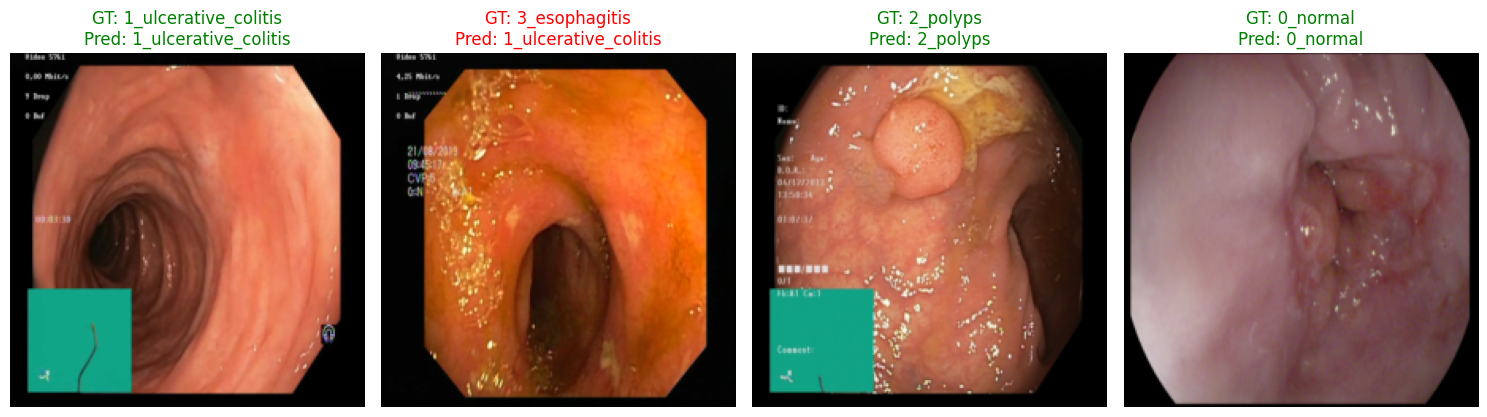

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Function to visualize one prediction per class
def show_predictions_per_class(model, loader, device, class_names):
    model.eval()  # Set model to evaluation mode (disables dropout, etc.)

    # Initialize dictionary to store one image per class
    collected = {classname: None for classname in class_names}

    with torch.no_grad():  # No gradient calculation needed for evaluation
        for inputs, labels in loader:
            inputs = inputs.to(device)  # Move images to device (GPU/CPU)
            labels = labels.to(device)
            outputs = model(inputs)  # Forward pass
            _, preds = torch.max(outputs, 1)  # Get predicted class indices

            for i in range(inputs.size(0)):
                true_label_idx = labels[i].cpu().item()  # Ground truth class index
                true_label_name = class_names[true_label_idx]  # Get class name

                # If we haven't collected a sample for this class yet, store it
                if collected[true_label_name] is None:
                    collected[true_label_name] = (inputs[i].cpu(), preds[i].cpu())

            # If we've collected one sample for every class, we can stop
            if all(v is not None for v in collected.values()):
                break

    # Now plot the collected images and their predictions
    num_classes = len(class_names)
    fig = plt.figure(figsize=(15, 4))  # Set figure size

    for idx, classname in enumerate(class_names):
        img, pred = collected[classname]  # Retrieve stored image and prediction

        ax = plt.subplot(1, num_classes, idx + 1)  # Create subplot for each class
        img_plot = img.permute(1, 2, 0).numpy()  # Change from (C, H, W) to (H, W, C)
        img_plot = (img_plot * 0.5) + 0.5  # Undo normalization (from [-1, 1] to [0, 1])
        img_plot = np.clip(img_plot, 0, 1)  # Clip values to valid range

        plt.imshow(img_plot)  # Display image
        pred_label = class_names[pred.item()]  # Predicted label name
        color = 'green' if pred_label == classname else 'red'  # Green if correct, red if wrong

        ax.set_title(f"GT: {classname}\nPred: {pred_label}", color=color)  # Set title with color
        ax.axis('off')  # Hide axes

    plt.tight_layout()  # Adjust spacing
    plt.show()  # Display the plot

# Call the function to show predictions
show_predictions_per_class(model, test_loader, device, class_names)

In [ ]:
import zipfile
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

# Path to your zip file
zip_path = "/content/gdrive/MyDrive/ColabNotebooks_PegahKhosravi/CS74020_Spring2025/Dataset_BUSI_with_GT.zip"

# Directory where you want to extract
unzip_dir = "/content/Dataset_BUSI_with_GT"

# Unzip only if not already extracted
if not os.path.exists(unzip_dir):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall("/content/")
    print("Unzipped successfully!")
else:
    print("Already unzipped.")

Breast Ultrasound Images Dataset: https://www.kaggle.com/datasets/aryashah2k/breast-ultrasound-images-dataset

This code demonstrates how to apply a transformer-based model, SegFormer, for semantic segmentation of breast ultrasound images. A custom PyTorch dataset is created, where each image is paired with a binary mask indicating the presence of a tumor (benign or malignant) or normal tissue. The SegFormer model, pre-trained on ADE20K (This dataset name comes from the Adequate Data for Environment parsing project, and the “20K” refers to the number of images.), is fine-tuned to distinguish between background and abnormal regions by resizing inputs to 224x224, normalizing them, and training for five epochs. The model uses pixel-wise cross-entropy loss to learn the segmentation task, and during evaluation, predictions are upsampled to match the input size for accurate visualization. This example shows us how transformers can be adapted not only for detection but also for dense pixel-wise prediction tasks like medical image segmentation, highlighting the versatility of vision transformers in real-world applications.

In [ ]:
# Install necessary libraries if not installed
# !pip install transformers datasets timm

# Import required libraries
import os
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.transforms import functional as TF
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  # For progress bars
from transformers import SegformerForSemanticSegmentation, SegformerFeatureExtractor  # Pretrained SegFormer

# Set computation device (GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Path to the root of the dataset
dataset_path = "/content/Dataset_BUSI_with_GT"

# Define custom dataset for Breast Ultrasound images
class BreastUltrasoundDataset(Dataset):
    def __init__(self, root_dir, transform=None, mask_transform=None):
        self.images = []
        self.masks = []
        self.transform = transform  # Image transform
        self.mask_transform = mask_transform  # Mask transform

        # Go through each subfolder (benign, malignant, normal)
        for category in ["benign", "malignant", "normal"]:
            category_path = os.path.join(root_dir, category)
            for file in os.listdir(category_path):
                if "_mask" not in file:  # Skip mask files here, just images
                    img_path = os.path.join(category_path, file)
                    mask_name = file.replace(".png", "_mask.png")
                    mask_path = os.path.join(category_path, mask_name)
                    self.images.append(img_path)

                    # If mask exists, add it; otherwise, add None (for 'normal' cases)
                    self.masks.append(mask_path if os.path.exists(mask_path) else None)

    def __len__(self):
        return len(self.images)  # Number of samples

    def __getitem__(self, idx):
        img_path = self.images[idx]
        img = Image.open(img_path).convert('RGB')  # Convert image to RGB

        if self.transform:
            img = self.transform(img)  # Apply image transforms

        mask_path = self.masks[idx]
        if mask_path is not None:
            mask = Image.open(mask_path).convert('L')  # Convert mask to grayscale
            if self.mask_transform:
                mask = self.mask_transform(mask)  # Apply mask transform
            mask = (mask > 0).long()  # Binarize: tumor = 1, background = 0
        else:
            mask = torch.zeros((224, 224), dtype=torch.long)  # Empty mask for normal images

        return img, mask

# Define transformations for images and masks
image_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224 for SegFormer
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)  # Normalize to [-1, 1]
])

mask_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load dataset and create DataLoader
full_dataset = BreastUltrasoundDataset(dataset_path, transform=image_transform, mask_transform=mask_transform)
train_loader = DataLoader(full_dataset, batch_size=8, shuffle=True)

# Load pre-trained SegFormer model (fine-tuned on ADE20K, 512x512)
model = SegformerForSemanticSegmentation.from_pretrained(
    "nvidia/segformer-b0-finetuned-ade-512-512",
    num_labels=2,  # Two classes: background and abnormal region
    ignore_mismatched_sizes=True  # Ignore size mismatch warnings
)

model = model.to(device)  # Move model to GPU/CPU

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()  # For segmentation (pixel-wise classification)
optimizer = torch.optim.Adam(model.parameters(), lr=5e-5)  # Adam optimizer

# Training loop
EPOCHS = 5  # Number of epochs

for epoch in range(EPOCHS):
    model.train()  # Set model to training mode
    running_loss = 0
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS}")

    for images, masks in progress_bar:
        images, masks = images.to(device), masks.to(device)

        # Forward pass through SegFormer
        outputs = model(pixel_values=images).logits

        # Resize output logits to match target mask size (224x224)
        outputs = torch.nn.functional.interpolate(
            outputs, size=(224, 224), mode="bilinear", align_corners=False
        )

        # Calculate loss between predicted mask and true mask
        loss = criterion(outputs, masks.squeeze(1))  # Remove channel dimension from mask

        optimizer.zero_grad()  # Clear previous gradients
        loss.backward()  # Backpropagation
        optimizer.step()  # Update model weights

        running_loss += loss.item()
        progress_bar.set_postfix({'loss': running_loss / (progress_bar.n + 1)})

print("\nTraining complete!")

# Visualization function to see model predictions
def visualize_predictions(model, dataset, device, num_samples=5):
    model.eval()  # Set model to evaluation mode
    fig, axs = plt.subplots(num_samples, 3, figsize=(12, num_samples * 4))  # 3 columns: input, GT, prediction

    for i in range(num_samples):
        image, mask = dataset[i]
        input_img = image.unsqueeze(0).to(device)  # Add batch dimension

        with torch.no_grad():
            output = model(pixel_values=input_img).logits
            output = torch.nn.functional.interpolate(output, size=(224, 224), mode="bilinear", align_corners=False)
            pred_mask = torch.argmax(output, dim=1).squeeze(0).cpu()  # Get predicted class per pixel

        # Prepare image for display
        img = image.permute(1, 2, 0).cpu().numpy()  # Convert from CHW to HWC
        img = (img * 0.5) + 0.5  # Unnormalize image

        # Plot input image
        axs[i, 0].imshow(img)
        axs[i, 0].set_title("Input Image")
        axs[i, 0].axis('off')

        # Plot ground truth mask
        axs[i, 1].imshow(mask.squeeze(0).cpu(), cmap='gray')
        axs[i, 1].set_title("Ground Truth Mask")
        axs[i, 1].axis('off')

        # Plot predicted mask
        axs[i, 2].imshow(pred_mask, cmap='gray')
        axs[i, 2].set_title("Predicted Mask")
        axs[i, 2].axis('off')

    plt.tight_layout()
    plt.show()

# Display predictions for 5 random samples
visualize_predictions(model, full_dataset, device, num_samples=5)


This implementation performs semantic segmentation on breast ultrasound images using SegFormer, a state-of-the-art Transformer-based architecture designed for pixel-level classification. The dataset is structured into subfolders for each category (benign, malignant, normal), where each image may optionally have a corresponding mask indicating the region of abnormality. A custom PyTorch Dataset class is defined to load image-mask pairs, applying appropriate transformations to resize and normalize the inputs to fit the model’s requirements.

SegFormer is loaded via Hugging Face's transformers library with the segformer-b0-finetuned-ade-512-512 checkpoint. Although it was pretrained on a different dataset (ADE20K), we fine-tune it on the ultrasound images by adjusting the number of output classes to 2 (background and abnormal region). The images are resized to 224×224 and passed to the model as pixel_values, which the SegFormer processes via hierarchical attention and lightweight MLP decoders to generate a coarse segmentation map.

The predicted logits are resized to match the ground truth mask size using bilinear interpolation. A standard cross-entropy loss function is used to compare the predicted segmentation map to the true binary mask, and the model is trained using Adam with a low learning rate to adapt to the specific imaging domain. The training loop iterates through the dataset, updating model weights to minimize pixel-wise classification error.

Finally, the notebook includes a visualization function to display input images alongside their ground truth and predicted segmentation masks. This makes it easier to qualitatively assess the model's performance, especially in medical imaging where interpretability is key.

The code defines and runs an evaluation function for a segmentation model using the Intersection over Union (IoU) and Dice Score metrics. It first creates a DataLoader (test_loader) to load the evaluation dataset in batches. The evaluate_segmentation function then sets the model to evaluation mode and, without computing gradients, loops over the test data. For each batch, the model generates segmentation predictions, which are resized to match the original mask size (224×224) using bilinear interpolation. Predictions and ground truth masks are flattened into 1D tensors for metric calculation. The IoU measures the overlap between predicted and true masks, while the Dice Score quantifies their similarity, both using a smoothing factor to avoid division by zero. After processing all batches, the function computes the average IoU and Dice Score across the dataset and prints them.

In [ ]:
# Create DataLoader for evaluation (no shuffling to preserve order)
test_loader = DataLoader(full_dataset, batch_size=8, shuffle=False)

# Function to calculate Dice Score and Intersection over Union (IoU)
def evaluate_segmentation(model, loader, device):
    model.eval()  # Set model to evaluation mode
    smooth = 1e-6  # Small constant to avoid division by zero

    total_iou = 0  # Accumulate IoU over all batches
    total_dice = 0  # Accumulate Dice score over all batches
    num_batches = 0  # Count batches for averaging

    with torch.no_grad():  # Disable gradient calculation (saves memory)
        for images, masks in loader:
            images, masks = images.to(device), masks.to(device)  # Move data to device

            outputs = model(pixel_values=images).logits  # Get raw predictions
            outputs = torch.nn.functional.interpolate(
                outputs, size=(224, 224), mode="bilinear", align_corners=False
            )  # Resize output to match target size

            preds = torch.argmax(outputs, dim=1)  # Get predicted class for each pixel

            # Flatten predictions and masks to 1D for metric computation
            preds = preds.view(-1)
            masks = masks.squeeze(1).view(-1)  # Remove channel dimension from masks

            # Compute intersection and union for IoU and Dice
            intersection = (preds * masks).sum()  # Count overlapping positive pixels
            union = preds.sum() + masks.sum()  # Total predicted + actual positives

            # Calculate IoU and Dice with smoothing
            iou = intersection / (union - intersection + smooth)
            dice = (2 * intersection) / (union + smooth)

            # Accumulate
            total_iou += iou.item()
            total_dice += dice.item()
            num_batches += 1

    # Compute average scores
    avg_iou = total_iou / num_batches
    avg_dice = total_dice / num_batches

    # Print evaluation results
    print(f"\nTest IoU: {avg_iou:.4f}")
    print(f"Test Dice Score: {avg_dice:.4f}")

# Run evaluation on test set
evaluate_segmentation(model, test_loader, device)



Test IoU: 0.5830
Test Dice Score: 0.6796


This code demonstrates how a lightweight object detection model, YOLOv8n (You Only Look Once, Version 8 - Nano), can be adapted to detect and classify breast tumors in ultrasound images. The dataset preparation involves automatically generating bounding box annotations by extracting tumor boundaries from segmentation masks, with each sample labeled as either benign or malignant. The dataset is then organized following the YOLO format, with normalized center coordinates and dimensions for bounding boxes. Images and labels are split into training and validation sets to facilitate evaluation.

A pretrained YOLOv8n model, originally trained on the COCO (Common Objects in Context) dataset—a large-scale benchmark dataset containing over 200,000 labeled images across 80 everyday object categories—is fine-tuned on the specialized medical dataset, using resized (224x224) ultrasound images to speed up training and inference. The model is optimized using default YOLOv8 settings, with early stopping via patience and configurable batch sizes.

After training, official evaluation metrics including mAP50, mAP50-95, Precision, and Recall are automatically computed to assess model performance. The mAP (mean Average Precision) metric summarizes the precision-recall trade-off for object detection models. Specifically, mAP50 represents the average precision at a 50% Intersection-over-Union (IoU) threshold, while mAP50-95 averages performance over multiple IoU thresholds from 0.50 to 0.95 in 0.05 increments—providing a more comprehensive evaluation of localization accuracy.

This code provides a fast, efficient adaptation of state-of-the-art real-time detection models for specialized tasks such as breast cancer detection, demonstrating how modern detection pipelines can be successfully applied to medical imaging.

In [ ]:
# Install Ultralytics (YOLOv8) if not already installed
!pip install -q ultralytics

# Import required libraries
import os
import shutil
import numpy as np
from PIL import Image
from tqdm import tqdm  # For progress bars
from sklearn.model_selection import train_test_split  # For train/val split

# Paths
root_path = "/content/Dataset_BUSI_with_GT"  # Path to original BUSI dataset
yolo_dataset_path = "/content/yolo_ultrasound"  # New path to create YOLO-formatted dataset

# Clean the target directory if it already exists
if os.path.exists(yolo_dataset_path):
    shutil.rmtree(yolo_dataset_path)

# Create necessary folder structure for YOLOv8
os.makedirs(os.path.join(yolo_dataset_path, "images", "train"), exist_ok=True)
os.makedirs(os.path.join(yolo_dataset_path, "images", "val"), exist_ok=True)
os.makedirs(os.path.join(yolo_dataset_path, "labels", "train"), exist_ok=True)
os.makedirs(os.path.join(yolo_dataset_path, "labels", "val"), exist_ok=True)

# Collect all image and corresponding mask pairs (benign and malignant only)
all_data = []
for category in ["benign", "malignant"]:
    category_path = os.path.join(root_path, category)
    for file in os.listdir(category_path):
        if "_mask" not in file:  # Skip mask files here
            img_path = os.path.join(category_path, file)
            mask_path = os.path.join(category_path, file.replace(".png", "_mask.png"))
            if os.path.exists(mask_path):  # Ensure mask exists
                label = 0 if category == "benign" else 1  # 0: benign, 1: malignant
                all_data.append((img_path, mask_path, label))

# Split the dataset into training and validation sets (80% / 20%)
train_data, val_data = train_test_split(all_data, test_size=0.2, random_state=42)

# Function to convert binary mask into YOLO bounding box format
def create_yolo_label(mask_path, label):
    mask = np.array(Image.open(mask_path).convert('L'))  # Load mask as grayscale
    ys, xs = np.where(mask > 0)  # Get coordinates where mask > 0

    if len(xs) == 0 or len(ys) == 0:
        return None  # No tumor detected in mask

    # Get bounding box from mask
    xmin, xmax = np.min(xs), np.max(xs)
    ymin, ymax = np.min(ys), np.max(ys)

    width = mask.shape[1]
    height = mask.shape[0]

    # Convert to YOLO format: [class x_center y_center width height], all normalized [0,1]
    x_center = (xmin + xmax) / 2.0 / width
    y_center = (ymin + ymax) / 2.0 / height
    bbox_width = (xmax - xmin) / width
    bbox_height = (ymax - ymin) / height

    return f"{label} {x_center:.6f} {y_center:.6f} {bbox_width:.6f} {bbox_height:.6f}"

# Function to copy images and create YOLO annotation files
def process_data(dataset, split):
    for img_path, mask_path, label in tqdm(dataset, desc=f"Processing {split}"):
        filename = os.path.basename(img_path)
        name_without_ext = os.path.splitext(filename)[0]

        # Copy image to YOLO folder
        dst_img_path = os.path.join(yolo_dataset_path, "images", split, filename)
        shutil.copy(img_path, dst_img_path)

        # Create YOLO label from mask
        yolo_label = create_yolo_label(mask_path, label)
        if yolo_label:
            label_path = os.path.join(yolo_dataset_path, "labels", split, f"{name_without_ext}.txt")
            with open(label_path, "w") as f:
                f.write(yolo_label + "\n")  # Save as .txt file

# Process training and validation datasets
process_data(train_data, "train")
process_data(val_data, "val")

# Create YAML config file for YOLO training
dataset_yaml = """
path: /content/yolo_ultrasound
train: images/train
val: images/val

names:
  0: benign
  1: malignant
"""

# Write YAML to file
with open("/content/yolo_ultrasound.yaml", "w") as f:
    f.write(dataset_yaml)

print("Dataset ready!")  # Inform user

# Import YOLOv8 from Ultralytics
from ultralytics import YOLO

# Load a pre-trained YOLOv8 model ('n' = nano, fastest/smallest)
model = YOLO('yolov8n.pt')

# Train the model
model.train(
    data="/content/yolo_ultrasound.yaml",  # Path to dataset config
    epochs=50,  # Number of training epochs
    imgsz=224,  # Resize input images to 224x224
    batch=16,   # Batch size
    patience=10  # Early stopping if validation doesn't improve
)


This script transforms a segmentation dataset (BUSI breast ultrasound) into an object detection format compatible with YOLOv8, enabling detection of tumor regions as bounding boxes rather than full pixel-wise masks. For each ultrasound image, the corresponding binary segmentation mask is used to compute the smallest bounding box that encloses the tumor. These boxes are then converted to YOLO format, which includes the class label (benign or malignant) and normalized bounding box coordinates. The result is a clean dataset structured for detection, with annotations saved as .txt files in the expected folder hierarchy.

The model architecture used is YOLOv8 Nano, a lightweight and fast variant of the YOLOv8 family. It retains the core YOLO structure: a CNN backbone (e.g., CSP-based feature extractor), neck layers (like PAN or FPN for feature fusion), and a head for object classification and localization. YOLOv8 introduces enhancements such as decoupled heads, anchor-free detection, and better scaling, while YOLOv8n.pt starts from pretrained weights trained on a large detection corpus. The model is then fine-tuned on the ultrasound data for 50 epochs, learning to detect and localize tumors in real-time.

The object detection model was trained to classify and localize two classes: benign and malignant. The final performance metrics indicate that the model achieved a precision of 87.9%, meaning that most of its predictions were correct when it identified an object. Its recall reached 71.8%, showing it was able to detect a significant portion of the actual objects. The model also achieved a strong mAP@0.5 of 81.4%, reflecting high detection quality at a 50% intersection-over-union threshold, and a more challenging mAP@0.5:0.95 of 53.9%, indicating solid overall accuracy across a range of stricter thresholds. A composite fitness score of 0.567 was computed to help determine the best model checkpoint.

Training proceeded smoothly, with losses decreasing steadily and metrics improving across epochs, suggesting effective convergence. During training, key components included the box loss, which measures the accuracy of predicted bounding boxes; the classification (cls) loss, which evaluates how well the model distinguishes between benign and malignant cases; and distribution focal loss (dfl), which enhances box regression precision. The training also monitored GPU memory usage, image processing speed, and optimization parameters such as learning rate (lr) and momentum (mom). Input image size and various performance metrics like precision (P), recall (R), and mean average precision (mAP) were tracked to ensure a balanced and accurate model. Overall, the results point to a well-trained and efficient object detector with strong potential for real-world medical or diagnostic applications.

After training the YOLOv8n model on breast ultrasound images, this section evaluates the model's detection performance using standard metrics such as mean Average Precision at IoU threshold 0.5 (mAP50), mean Average Precision across IoU thresholds from 0.5 to 0.95 (mAP50-95), mean Precision, and mean Recall. The evaluation is performed on the validation set, ensuring consistency with the image size and batch size used during training. Additionally, the code saves visualizations of the model’s predictions on the validation images by drawing bounding boxes with confidence scores, allowing for qualitative assessment of detection quality. The predicted images are organized into a dedicated folder, facilitating the generation of reports or further manual review. This provides both quantitative and qualitative insights into the model’s performance on the breast cancer detection task.

In [ ]:
# -------------------------------------------
# After training the model
# -------------------------------------------

# Official Evaluation (mAP, Precision, Recall)
metrics = model.val(
    data="/content/yolo_ultrasound.yaml",  # Dataset YAML
    imgsz=224,  # Image size
    batch=16,   # Same batch size as training
    conf=0.5    # Confidence threshold for evaluation
)

# After model.val()
print(f"mAP50: {metrics.box.map50:.4f}")
print(f"mAP50-95: {metrics.box.map:.4f}")
print(f"Precision: {metrics.box.mp:.4f}")
print(f"Recall: {metrics.box.mr:.4f}")


# -------------------------------------------
# Save predictions with drawn boxes (optional)
# -------------------------------------------

model.predict(
    source="/content/yolo_ultrasound/images/val",  # Validation images
    save=True,     # Save images with predictions
    conf=0.5,      # Confidence threshold
    imgsz=224,     # Same image size
    project="/content/yolo_predictions",  # Where to save
    name="val_predictions",   # Folder name
    exist_ok=True  # Overwrite if exists
)

print("Predicted images with boxes are saved to /content/yolo_predictions/val_predictions")


This code provides a detailed visualization of YOLOv8n predictions compared against ground truth annotations derived from segmentation masks. For selected examples from the validation dataset, both predicted bounding boxes and ground truth boxes are displayed on the original ultrasound images, with color-coding based on the predicted class and confidence score. In addition to qualitative inspection, the code quantitatively evaluates detection performance by calculating the Intersection over Union (IoU) between the predicted bounding box and the ground truth box for each sample. An average IoU score is computed across all selected samples, offering a direct and interpretable metric for assessing the model’s localization accuracy. This combination of visual and numerical evaluation provides a comprehensive understanding of the model's effectiveness in detecting and classifying breast tumors in ultrasound images.

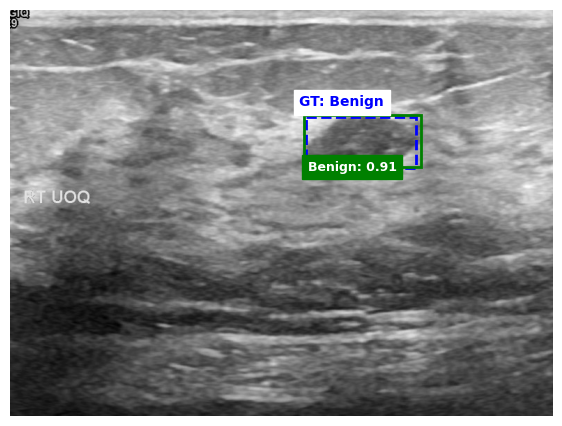

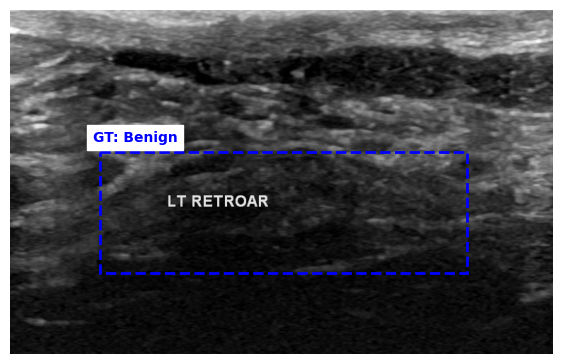

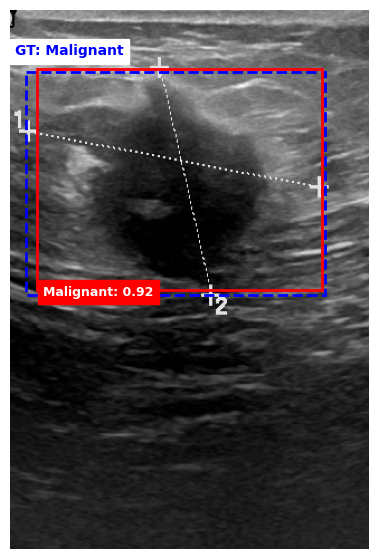

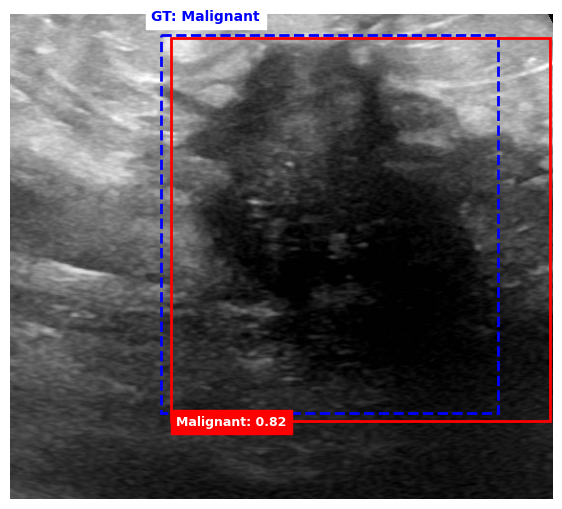


Average IoU over 3 samples: 0.8818


In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt  # For displaying images and drawing boxes
import matplotlib.patches as patches  # For drawing rectangle patches
import torch  # PyTorch for tensor operations
import numpy as np  # For array manipulations
from PIL import Image  # For loading and handling images

# Function to visualize predictions and compute average IoU
def visualize_yolov8_predictions_with_iou(model, dataset, num_images_per_class=2, score_threshold=0.5, max_boxes=2):
    model.eval()  # Set model to evaluation mode

    benign_indices = []  # List to store indices of benign samples
    malignant_indices = []  # List to store indices of malignant samples

    # Separate dataset indices by class label (0 = benign, 1 = malignant)
    for idx, (img_path, mask_path, label) in enumerate(dataset):
        if label == 0:
            benign_indices.append(idx)  # Append benign index
        else:
            malignant_indices.append(idx)  # Append malignant index

    # Select the specified number of samples from each class
    selected_indices = benign_indices[:num_images_per_class] + malignant_indices[:num_images_per_class]

    total_iou = 0  # Initialize IoU accumulator
    count = 0  # Initialize sample count for IoU calculation

    # Loop through selected samples
    for idx in selected_indices:
        img_path, mask_path, label = dataset[idx]  # Unpack image, mask, and label

        img = Image.open(img_path).convert('RGB')  # Load image and convert to RGB
        img_np = np.array(img)  # Convert image to NumPy array for visualization

        results = model.predict(img_path, conf=score_threshold, save=False, verbose=False)  # Run model prediction

        fig, ax = plt.subplots(1, 1, figsize=(7, 7))  # Create a plot
        ax.imshow(img_np)  # Display the image

        # Process ground truth mask and extract bounding box
        mask = np.array(Image.open(mask_path).convert('L'))  # Load and convert mask to grayscale array
        ys, xs = np.where(mask > 0)  # Find non-zero mask coordinates

        if len(xs) > 0 and len(ys) > 0:
            xmin_gt, xmax_gt = np.min(xs), np.max(xs)  # Ground truth X bounds
            ymin_gt, ymax_gt = np.min(ys), np.max(ys)  # Ground truth Y bounds

            # Draw ground truth bounding box (blue, dashed)
            rect_gt = patches.Rectangle(
                (xmin_gt, ymin_gt),
                xmax_gt - xmin_gt,
                ymax_gt - ymin_gt,
                linewidth=2,
                edgecolor='blue',
                facecolor='none',
                linestyle='--'
            )
            ax.add_patch(rect_gt)  # Add GT box to plot

            # Annotate GT label above and left of box
            gt_class_name = "Malignant" if label == 1 else "Benign"
            ax.text(
                xmin_gt - 10,
                ymin_gt - 15,
                f"GT: {gt_class_name}",
                color='blue',
                fontsize=10,
                backgroundcolor='white',
                weight='bold'
            )

        # Initialize lists for predicted boxes, scores, and labels
        boxes = []
        scores = []
        labels = []

        # Process predictions
        for r in results:
            if r.boxes is not None:
                boxes_tensor = r.boxes.xyxy.cpu()  # Predicted bounding boxes (xyxy format)
                scores_tensor = r.boxes.conf.cpu()  # Confidence scores
                labels_tensor = r.boxes.cls.cpu()  # Class labels

                # Filter predictions by score threshold
                for box, score, pred_label in zip(boxes_tensor, scores_tensor, labels_tensor):
                    if score >= score_threshold:
                        boxes.append(box)
                        scores.append(score)
                        labels.append(int(pred_label))

        # Limit predictions to top N boxes
        if len(boxes) > max_boxes:
            sorted_indices = torch.argsort(torch.tensor(scores), descending=True)  # Sort by score
            boxes = [boxes[i] for i in sorted_indices[:max_boxes]]  # Keep top boxes
            labels = [labels[i] for i in sorted_indices[:max_boxes]]
            scores = [scores[i] for i in sorted_indices[:max_boxes]]

        # Compute IoU between first prediction and GT box
        if boxes and len(xs) > 0:
            pred_box = boxes[0]  # Use top prediction
            xmin_p, ymin_p, xmax_p, ymax_p = pred_box  # Unpack prediction box

            # Compute intersection
            xi1 = max(xmin_p, xmin_gt)
            yi1 = max(ymin_p, ymin_gt)
            xi2 = min(xmax_p, xmax_gt)
            yi2 = min(ymax_p, ymax_gt)
            inter_area = max(0, xi2 - xi1) * max(0, yi2 - yi1)

            # Compute union
            pred_area = (xmax_p - xmin_p) * (ymax_p - ymin_p)
            gt_area = (xmax_gt - xmin_gt) * (ymax_gt - ymin_gt)
            union_area = pred_area + gt_area - inter_area

            # Compute IoU
            iou = inter_area / union_area if union_area > 0 else 0
            total_iou += iou  # Accumulate IoU
            count += 1  # Increment count

        # Draw predicted bounding boxes and labels
        for box, label_pred, score in zip(boxes, labels, scores):
            xmin, ymin, xmax, ymax = box  # Unpack prediction box
            color = 'red' if label_pred == 1 else 'green'  # Color by predicted class

            # Draw prediction box
            rect = patches.Rectangle(
                (xmin, ymin),
                xmax - xmin,
                ymax - ymin,
                linewidth=2,
                edgecolor=color,
                facecolor='none'
            )
            ax.add_patch(rect)  # Add prediction box to plot

            # Annotate prediction label below and right of box
            class_name = "Malignant" if label_pred == 1 else "Benign"
            label_text = f"{class_name}: {score:.2f}"
            ax.text(
                xmin + 5,
                ymax + 5,
                label_text,
                color='white',
                fontsize=9,
                backgroundcolor=color,
                weight='bold'
            )

        plt.axis('off')  # Hide axis ticks
        plt.show()  # Display the plot

    # Compute and print average IoU
    avg_iou = total_iou / count if count > 0 else 0
    print(f"\nAverage IoU over {count} samples: {avg_iou:.4f}")

# Example usage
# Call the function using a validation dataset and YOLOv8 model
visualize_yolov8_predictions_with_iou(model, val_data, num_images_per_class=2, score_threshold=0.5)


# Attention vs Higher-level Attention (like Grad-CAM)

# 1. Regular Attention Maps (inside Transformer models and ViT)

- **Source**: These come from **attention heads** inside a Transformer or Vision Transformer (ViT).
- **What it shows**: For each token (word) or patch (image), *where it "looks"* — indicating how much it depends on other parts.
- **Produced by**: Self-attention mechanism.
- **Example**: In a sentence, the word "dog" might attend strongly to "barks". In ViT, a patch covering a dog's ear may attend to the dog's face.
- **Limitations**:
  - Attention scores are very raw and complex.
  - Many heads and layers, making it hard to interpret.
  - High attention ≠ real importance for the output.

# 2. Higher-Level Visual Attention (Grad-CAM, etc.)

- **Source**: Computed using **gradients** of a specific output (e.g., class score).
- **What it shows**: *Which regions* in the input (image) contributed most to the prediction.
- **Produced by**: Gradient flow back to feature maps (usually after CNN layers).
- **Example**: For an image classified as "dog," Grad-CAM would highlight the dog’s face or important features.
- **Limitations**:
  - It's an **approximation** and not direct "attention".
  - Sensitive to model architecture.

# 3. Why This Difference Matters

| Type | What it shows | Best Use | Limitations |
|:-----|:--------------|:---------|:------------|
| **Attention Maps (Transformer, ViT)** | Dependency between tokens or patches | Analyzing internal model behavior and structure | Hard to interpret, not always linked to prediction importance |
| **Grad-CAM Heatmaps** | Spatial regions influencing final decision | Explaining model outputs visually | Only approximate, architecture-specific |

# 4. Summary:

- **Attention maps** = understanding internal **relationships** (especially useful in ViTs and NLP Transformers). **Attention maps** = internal thinking process
- **Grad-CAM** = explaining the final **decision-making process** in CNNs (and with modifications in ViT too). **Grad-CAM** = where the decision was made based on input.




This code demonstrates how a pretrained ResNet-18 convolutional neural network can be fine-tuned for classification of ultrasound images into multiple categories. The dataset is organized into separate training, validation, and testing directories, and images are standardized by resizing to 224×224 pixels and normalizing their intensity values. A pretrained ResNet-18 model, originally trained on the ImageNet dataset, is modified by replacing its final fully connected layer to match the number of target classes. The model is trained using the Adam optimizer and cross-entropy loss, and evaluated after each epoch on a validation set to monitor classification accuracy. The use of a pretrained backbone enables faster convergence and leverages learned visual features, making it highly effective for transfer learning on specialized medical imaging tasks.

In [ ]:
# Install timm if needed (for other models; not used here)
# !pip install timm

# Import necessary PyTorch and image handling libraries
import torch  # Core PyTorch library
import torch.nn as nn  # Neural network module
import torch.optim as optim  # Optimization algorithms
from torchvision import datasets, transforms, models  # Image datasets, transforms, and pre-trained models
from torch.utils.data import DataLoader  # Data loading utility
from tqdm import tqdm  # Progress bar for loops
import os  # For file and directory handling

# Set computation device to GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define dataset directory paths
train_dir = '/content/train'  # Training data folder
val_dir = '/content/val'  # Validation data folder
test_dir = '/content/test'  # Testing data folder

# Get class names and number of classes from training folder
class_names = os.listdir(train_dir)  # Assumes folder names are class names
num_classes = len(class_names)  # Count the number of classes
print(f"Classes: {class_names}")  # Print found classes

# Define image transformations (resizing, normalization)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize all images to 224x224
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize with mean and std (grayscale assumed)
])

# Create datasets from folders with applied transformations
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
val_dataset = datasets.ImageFolder(root=val_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

# Wrap datasets in DataLoaders for batching and shuffling
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)  # Shuffle for training
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Load a pretrained ResNet18 model
model = models.resnet18(pretrained=True)  # Use ImageNet pretrained weights

# Replace the final fully connected layer with one matching the number of classes
model.fc = nn.Linear(model.fc.in_features, num_classes)  # Adapt for custom classification task
model = model.to(device)  # Move model to the selected device

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Suitable for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=2e-4)  # Adam optimizer with learning rate

# Training loop parameters
EPOCHS = 5  # Total number of training epochs

# Start training loop
for epoch in range(EPOCHS):
    model.train()  # Set model to training mode
    running_loss = 0  # Accumulate loss per epoch
    progress_bar = tqdm(train_loader, desc=f"Training Epoch {epoch+1}/{EPOCHS}")  # Show progress bar

    # Loop through training batches
    for inputs, labels in progress_bar:
        inputs, labels = inputs.to(device), labels.to(device)  # Move data to device

        optimizer.zero_grad()  # Reset gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update model parameters

        running_loss += loss.item()  # Accumulate batch loss
        progress_bar.set_postfix({'loss': running_loss / (progress_bar.n + 1)})  # Update progress bar with loss

    # Validation phase after each epoch
    model.eval()  # Set model to evaluation mode
    correct = 0  # Number of correct predictions
    total = 0  # Total predictions

    with torch.no_grad():  # Disable gradient calculation
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)  # Forward pass
            _, preds = torch.max(outputs, 1)  # Get predicted class
            correct += (preds == labels).sum().item()  # Count correct predictions
            total += labels.size(0)  # Count total samples

    # Print validation accuracy for the epoch
    print(f"Validation Accuracy after Epoch {epoch+1}: {100 * correct / total:.2f}%")

# Training complete
print("Training complete!")


This implementation performs image classification using ResNet-18, a well-known convolutional neural network designed with residual connections to enable deep networks to train effectively. The dataset is loaded from a directory structure where subfolder names represent class labels, and all images are resized to 224×224 and normalized before training.

ResNet-18 is used here as a feature extractor, loaded with pretrained weights from ImageNet. The final fully connected layer is replaced to match the number of target classes in the custom dataset. The architecture itself consists of an initial convolution and pooling layer, followed by four blocks of residual layers that allow gradients to flow through skip connections, reducing the risk of vanishing gradients in deep networks.

During training, the model receives batches of images and updates its weights based on cross-entropy loss using the Adam optimizer. After each epoch, the model is evaluated on a validation set to track generalization. By fine-tuning only the final classification layer (or more if desired), this transfer learning setup leverages powerful pre-learned visual features, making it highly effective even with limited data.

This code provides a visualization of model interpretability using Grad-CAM (Gradient-weighted Class Activation Mapping) applied to a fine-tuned ResNet-18 classifier. Grad-CAM generates heatmaps that highlight the regions in input ultrasound images that contribute most strongly to the model's predictions. Forward and backward hooks are attached to the final convolutional block of the model (layer4) to capture intermediate feature maps and gradients during inference. For each class, representative images are selected from the test set and displayed alongside their corresponding Grad-CAM overlays, allowing qualitative assessment of model focus areas. By comparing the original predictions and Grad-CAM visualizations, this approach offers insights into the decision-making process of the deep learning model and helps validate its relevance in medical imaging tasks such as breast tumor classification.

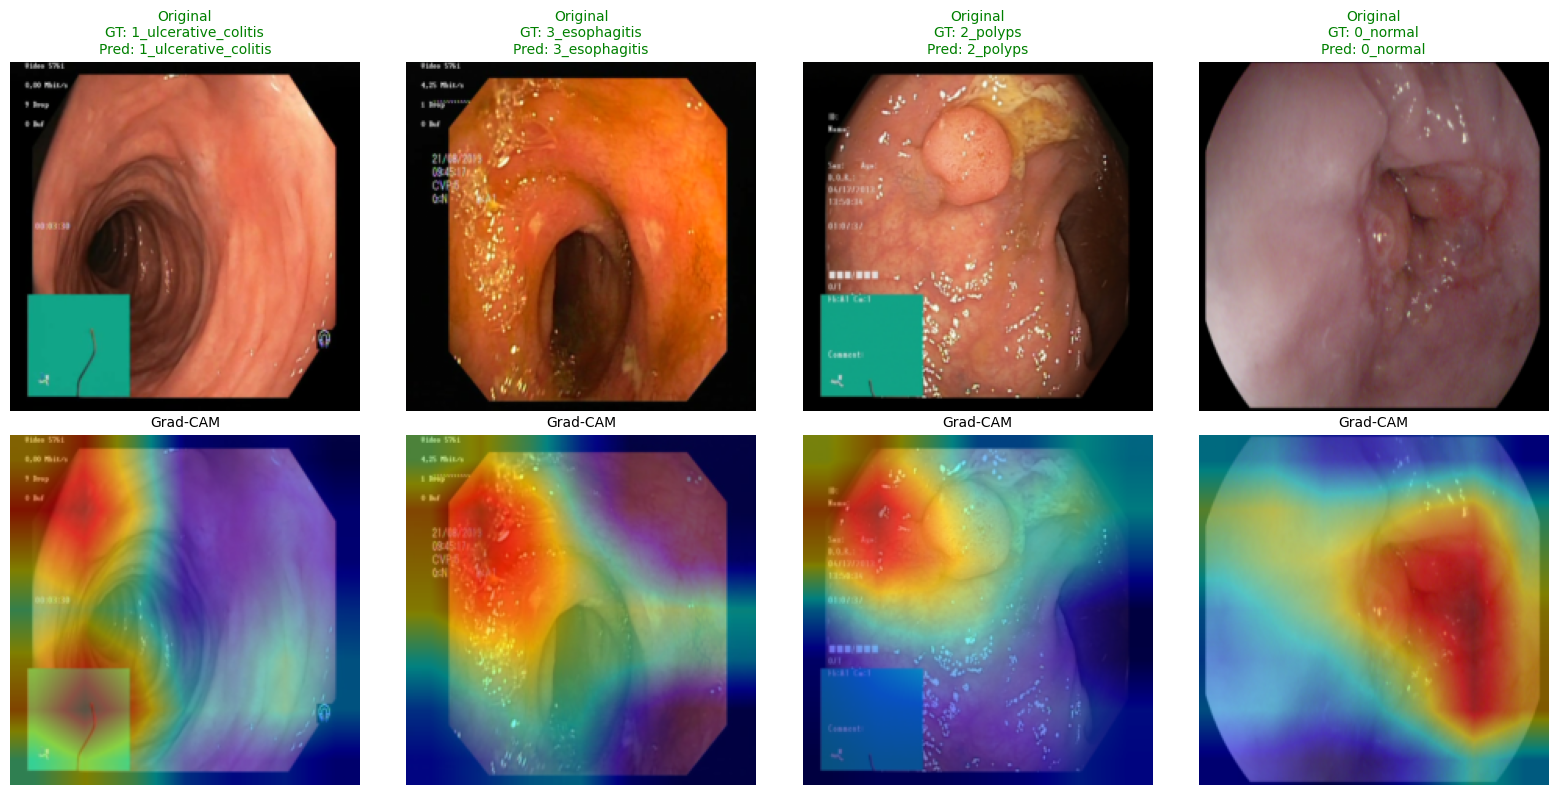

In [ ]:
# Import required libraries
import torchvision.transforms.functional as F  # For tensor image transformations
import cv2  # For image processing and heatmap generation
import numpy as np  # For numerical operations

# Generate Grad-CAM heatmap for a specific class prediction
def generate_gradcam(model, input_tensor, target_class=None):
    # Lists to store intermediate feature maps and gradients
    features = []
    gradients = []

    # Hook function to capture feature map output
    def forward_hook(module, input, output):
        features.append(output)

    # Hook function to capture gradients during backward pass
    def backward_hook(module, grad_in, grad_out):
        gradients.append(grad_out[0])

    # Register hooks on the last convolutional layer of ResNet
    target_layer = model.layer4[-1]  # Typically the last residual block
    handle_forward = target_layer.register_forward_hook(forward_hook)
    handle_backward = target_layer.register_backward_hook(backward_hook)

    # Forward pass
    model.zero_grad()  # Zero out previous gradients
    output = model(input_tensor.unsqueeze(0))  # Add batch dimension

    # If no target class is specified, use the predicted class
    if target_class is None:
        target_class = output.argmax().item()

    # Backward pass for the target class
    loss = output[0, target_class]
    loss.backward()

    # Get gradients and features
    grads = gradients[0]  # Gradients: [B, C, H, W]
    fmap = features[0]    # Feature map: [B, C, H, W]

    # Compute weights via global average pooling on gradients
    weights = grads.mean(dim=(2, 3), keepdim=True)

    # Weighted sum of feature maps
    cam = (weights * fmap).sum(dim=1).squeeze()

    # Apply ReLU and normalize the heatmap
    cam = torch.relu(cam)
    cam = cam - cam.min()
    cam = cam / cam.max()

    # Convert to numpy array
    cam = cam.cpu().detach().numpy()

    # Remove hooks after use
    handle_forward.remove()
    handle_backward.remove()

    return cam

# Visualize predictions with and without Grad-CAM
def show_predictions_with_and_without_gradcam(model, loader, device, class_names):
    model.eval()  # Set model to evaluation mode

    # Dictionary to store one example per class
    collected = {classname: None for classname in class_names}

    # Loop to collect one correctly or incorrectly predicted image per class
    with torch.no_grad():
        for inputs, labels in loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for i in range(inputs.size(0)):
                true_label_idx = labels[i].cpu().item()
                true_label_name = class_names[true_label_idx]

                # Store the first example found for each class
                if collected[true_label_name] is None:
                    collected[true_label_name] = (inputs[i].cpu(), preds[i].cpu())

            # Stop once we have one image per class
            if all(v is not None for v in collected.values()):
                break

    # Create a figure with space for original and Grad-CAM images
    num_classes = len(class_names)
    fig = plt.figure(figsize=(num_classes * 4, 8))

    for idx, classname in enumerate(class_names):
        img, pred = collected[classname]
        cam = generate_gradcam(model, img.to(device), target_class=pred.item())  # Generate Grad-CAM

        # Prepare original image for display
        img_plot = img.permute(1, 2, 0).numpy()  # Change from CxHxW to HxWxC
        img_plot = (img_plot * 0.5) + 0.5  # Denormalize (from mean=0.5, std=0.5)
        img_plot = np.clip(img_plot, 0, 1)  # Clip values between 0 and 1

        # Resize and colorize CAM heatmap
        cam = cv2.resize(cam, (img_plot.shape[1], img_plot.shape[0]))
        heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
        heatmap = np.float32(heatmap) / 255  # Normalize to 0-1

        # Blend heatmap with original image
        superimposed_img = 0.5 * heatmap[..., ::-1] + 0.5 * img_plot  # Convert BGR to RGB

        # Plot original image
        ax = plt.subplot(2, num_classes, idx + 1)
        plt.imshow(img_plot)
        pred_label = class_names[pred.item()]
        color = 'green' if pred_label == classname else 'red'  # Green if correct, red if wrong
        ax.set_title(f"Original\nGT: {classname}\nPred: {pred_label}", color=color, fontsize=10)
        ax.axis('off')

        # Plot Grad-CAM heatmap
        ax = plt.subplot(2, num_classes, num_classes + idx + 1)
        plt.imshow(superimposed_img)
        ax.set_title("Grad-CAM", fontsize=10)
        ax.axis('off')

    plt.tight_layout()  # Optimize layout
    plt.show()  # Display all images

# Example usage of the visualization function
show_predictions_with_and_without_gradcam(model, test_loader, device, class_names)


The dataset consists of four classes representing different gastrointestinal conditions. The normal class (0_normal) includes healthy gastrointestinal tissues with no visible abnormalities, serving as a baseline for comparison. Ulcerative colitis (1_ulcerative_colitis) is a chronic inflammatory bowel disease characterized by inflammation and ulcer formation along the lining of the colon, often causing severe discomfort and complications if untreated. Polyps (2_polyps) are abnormal tissue growths protruding from the inner walls of the colon or rectum; while often benign, some polyps carry a risk of progressing to colorectal cancer, making early detection critical. Esophagitis (3_esophagitis) refers to inflammation of the esophagus, which may result from acid reflux, infections, or allergic reactions, leading to symptoms such as pain or difficulty swallowing. Accurate classification of these conditions through medical imaging is essential for early diagnosis, appropriate treatment, and improved patient outcomes.

# Exploring BERT: Architecture and Purpose

# 1. What is BERT?

**BERT** stands for Bidirectional Encoder Representations from Transformers. It is a pre-trained deep learning model designed for Natural Language Understanding (NLU) tasks.

Unlike previous models that processed text either left-to-right or right-to-left, BERT reads the entire sequence at once, allowing it to truly capture context in both directions ("bidirectional").

- First introduced by: Google AI Language in 2018
- Main idea: Pre-train a deep Transformer model on large text corpora, and then fine-tune it on smaller, task-specific datasets.

# 2. Why Was BERT Created?

Before BERT, many models struggled to:
- Capture deep, nuanced meaning of words based on surrounding text.
- Efficiently adapt to various NLP tasks without re-training from scratch.

BERT changed this by:
- Using masked language modeling: learning to predict missing words.
- Pre-training once and then fine-tuning easily for tasks like sentiment analysis, question answering, or translation.

# 3. BERT Architecture

BERT is based only on the encoder part of the original Transformer architecture.

**Key Components:**

- Input Representation:
  - Tokens are first embedded.
  - Special tokens added:
    - `[CLS]` token (classification output)
    - `[SEP]` token (separator between segments)
- Stacked Transformer Encoders:
  - Typically 12 layers ("BERT-base") or 24 layers ("BERT-large").
  - Each layer contains:
    - Multi-head self-attention
    - Feed-forward neural networks
- Output:
  - `[CLS]` embedding represents the entire sentence (used for classification).
  - Other token embeddings can be used for token-level tasks (like named entity recognition).


### Special Tokens in BERT: [CLS] and [SEP]

1. [CLS] = Classification Token
- Added at the beginning of every input sequence.
- Final hidden state of this token is used as the aggregate representation of the input.
- Used for classification tasks like sentiment analysis, next sentence prediction, etc.

2. [SEP] = Separator Token
- Used to separate segments in the input.
- Marks the end of a sentence (for single sentence tasks) or separates two sentences (for pairwise tasks).
- Helps the model distinguish different parts of the input.

Example input for a sentence pair task:

- [CLS] The weather is nice today. [SEP] Do you want to go out? [SEP]

In BERT:
- [CLS] embedding is used for the final classification layer.
- [SEP] tokens guide the model in understanding sentence boundaries.


**Multi-head self-attention** is a key mechanism used in Transformer models (like in DETR, BERT, ViT, etc.) that allows the model to focus on different parts of an input sequence at the same time, capturing multiple types of relationships between tokens (or image patches)

**Typical sizes:**

| Model        | Layers | Hidden Size | Attention Heads | Parameters |
|--------------|--------|-------------|-----------------|------------|
| BERT-Base    | 12     | 768         | 12              | 110M       |
| BERT-Large   | 24     | 1024        | 16              | 340M       |

# 4. How BERT is Pre-trained

Before BERT can be used for downstream tasks like classification, question answering, or summarization, it must first learn the general structure of language. This is achieved through a pre-training phase where BERT solves two self-supervised learning tasks simultaneously: Masked Language Modeling (MLM) and Next Sentence Prediction (NSP).

In Masked Language Modeling (MLM), approximately 15% of the words in each input sentence are randomly replaced with a special [MASK] token. BERT is then tasked with predicting the original masked words based only on the surrounding context. For example, if given the sentence "The cat sat on the [MASK]," BERT must correctly predict that the missing word is "mat." This forces BERT to learn deep, bidirectional representations of language, understanding how each word relates to its neighbors in both directions.

In addition to MLM, BERT is trained with Next Sentence Prediction (NSP). This second task helps BERT grasp relationships between sentences, rather than just within them. During NSP training, BERT receives pairs of sentences. In 50% of the cases, the second sentence actually follows the first one in the original text. In the other 50%, the second sentence is a random sentence from the corpus. BERT must predict whether the second sentence is the true continuation or not. For example, if given "He opened the door." followed by "He saw his friend standing outside.", BERT should predict "Is Next". If instead given "He opened the door." followed by "Bananas are yellow.", BERT should predict "Not Next".

Together, these two objectives teach BERT to deeply understand both the meaning of individual words in context (via MLM) and the logical connections between sentences (via NSP). The combination of word-level and sentence-level understanding enables BERT to become a powerful foundation for a wide variety of natural language understanding tasks.

**Self-supervised learning** is a special form of unsupervised machine learning where the model learns useful patterns and representations directly from the input data, without relying on manually labeled examples. Instead, the model generates its own supervision signals by solving pretext tasks such as predicting missing parts of the input, detecting relationships, or reconstructing data structures. This approach enables the model to automatically learn meaningful features from large amounts of raw, unlabeled data.

# 5. How BERT is Fine-Tuned

Once pre-trained, BERT can be fine-tuned on a specific task with minimal architecture change:
- Add a simple classification head (like a linear layer).
- Fine-tune all parameters (BERT + new head) jointly on a smaller labeled dataset.

**Examples of Tasks:**
- Sentiment Analysis
- Question Answering (e.g., SQuAD)
- Named Entity Recognition (NER)
- Text Classification

# Summary
- BERT revolutionized NLP by enabling models to deeply understand context.
- It uses a bidirectional Transformer encoder architecture.
- Pre-trained on massive text corpora; fine-tuned easily for many downstream tasks.
- Foundation for many modern models like **RoBERTa**, **DistilBERT**, and even **GPT's encoder side**.

## Why Emotion Classification with BERT (and DistilBERT)?

In this section, we explore a practical NLP task: Emotion Classification.

We aim to train a machine learning model that can predict the emotional tone (joy, sadness, anger, etc.) behind a given text input.

This task is a real-world application of NLP techniques often used in:
- Social media monitoring
- Customer feedback analysis
- Mental health applications

Rather than building a model from scratch, we use pretrained models like DistilBERT to leverage transfer learning, significantly speeding up training and improving performance.

### DistilBERT
- A lighter, faster, and smaller version of BERT.
- Created through knowledge distillation (training a smaller model to mimic a larger model).
- About 40% smaller, 60% faster, but retains ~97% of BERT's performance.
- Ideal for training in resource-constrained environments (like Google Colab).

In this notebook, we use DistilBERT because it allows much faster training while still being very accurate.


## About the Dataset

We are using a **reduced sample** of a public emotion classification dataset.

- Original dataset can be found on Kaggle: [BERT-Emotion](https://www.kaggle.com/code/abdelrahmanekhaldi/bert-emotion-95-f1/input)
- **Note:** The dataset was **downloaded and reduced** to be smaller and faster to run for teaching and experimentation purposes.

You will load this dataset from Google Drive in the code.

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

# Step 2: Load CSV files from your Drive path
import pandas as pd

# Adjust the path to match where your files are located inside Drive
train_path = '/content/gdrive/MyDrive/ColabNotebooks_PegahKhosravi/CS74020_Spring2025/train.csv'
test_path = '/content/gdrive/MyDrive/ColabNotebooks_PegahKhosravi/CS74020_Spring2025/test.csv'

# Step 3: Read CSV files into pandas DataFrames
data_train = pd.read_csv(train_path)
data_test = pd.read_csv(test_path)

# Step 4 (Optional): Preview a few rows
print("Training Data Sample:")
print(data_train.head())

print("\nTest Data Sample:")
print(data_test.head())


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Training Data Sample:
   Emotion                                               Text
0        1  im also feeling super stressed but arent we al...
1        1               i come back to in order to feel safe
2        2  i don t remember ever feeling this tender towa...
3        1  i feel that i am already successful in that i ...
4        1  i was already feeling too welcomed after i got...

Test Data Sample:
   Emotion                                               Text
0        4      i just feel really helpless and heavy hearted
1        0  ive enjoyed being able to slouch about relax a...
2        4  i gave up my internship with the dmrg and am f...
3        0                         i dont know i feel so lost
4        4  i am a kindergarten teacher and i am thoroughl...


In this section, we fine-tune a DistilBERT model for emotion classification based on text data. Using a custom emotion dataset stored in Google Drive, we load and preprocess the data, tokenize the text, and build a PyTorch dataset and dataloader. We then fine-tune DistilBERT to classify texts into six emotion categories such as sadness, joy, and fear. After training, we evaluate the model's accuracy on the test set, save the fine-tuned model and tokenizer, and implement a simple function to predict the emotion from any new text input. We will learn how to perform text classification using Transformer models, fine-tune pretrained models on custom datasets, and save and deploy models for real-world use.

In [ ]:
# Emotion Classification with DistilBERT

# Step 1: Import Required Libraries
# (Install via: !pip install transformers datasets tqdm if needed)

import torch  # PyTorch core
import torch.nn as nn  # Neural network module
from torch.utils.data import DataLoader, Dataset  # For custom datasets and loading
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, get_scheduler  # Hugging Face tools
from torch.optim import AdamW  # Optimizer
from sklearn.model_selection import train_test_split  # Data splitting (optional here)
import pandas as pd  # For CSV reading
import numpy as np  # For array handling
from tqdm.notebook import tqdm  # Progress bar in notebooks
import time

# Step 2: Mount Google Drive and Load CSVs
from google.colab import drive
drive.mount('/content/gdrive')  # Connect to Google Drive to access files

# Define paths to training and test CSVs
train_path = '/content/gdrive/MyDrive/ColabNotebooks_PegahKhosravi/CS74020_Spring2025/train.csv'
test_path = '/content/gdrive/MyDrive/ColabNotebooks_PegahKhosravi/CS74020_Spring2025/test.csv'

# Load CSVs into pandas DataFrames (head to use a subset for quick runs)
data_train = pd.read_csv(train_path, encoding='utf-8').head(1000)
data_test = pd.read_csv(test_path, encoding='utf-8').head(100)

# Extract texts and labels
X_train = data_train['Text'].tolist()
y_train = data_train['Emotion'].tolist()
X_test = data_test['Text'].tolist()
y_test = data_test['Emotion'].tolist()

# Step 3: Prepare Label Mappings
label2id = {'sadness': 0, 'joy': 1, 'love': 2, 'anger': 3, 'fear': 4, 'surprise': 5}
id2label = {v: k for k, v in label2id.items()}

# Step 4: Tokenization
model_name = 'distilbert-base-uncased'
tokenizer = DistilBertTokenizer.from_pretrained(model_name)  # Load tokenizer

# Custom Dataset for tokenized text
class EmotionDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=350):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_len,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Create Dataset and DataLoaders
train_dataset = EmotionDataset(X_train, y_train, tokenizer)
test_dataset = EmotionDataset(X_test, y_test, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8)

# Step 5: Load DistilBERT Model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load pretrained DistilBERT model with custom classification head
model = DistilBertForSequenceClassification.from_pretrained(
    model_name,
    num_labels=len(label2id),
    id2label=id2label,
    label2id=label2id
)
model = model.to(device)  # Move model to GPU or CPU

# Optimizer and learning rate scheduler
optimizer = AdamW(model.parameters(), lr=2e-5)

num_training_steps = len(train_loader) * 3  # 3 epochs planned
lr_scheduler = get_scheduler(
    "linear", optimizer=optimizer,
    num_warmup_steps=0, num_training_steps=num_training_steps
)

# Step 6: Training Loop
def train_one_epoch(model, train_loader, optimizer, scheduler, device):
    model.train()
    total_loss = 0
    progress_bar = tqdm(train_loader, desc="Training", leave=False)

    for batch in progress_bar:
        optimizer.zero_grad()

        # Move inputs to device
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        # Forward pass
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels
        )
        loss = outputs.loss  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        scheduler.step()  # Update learning rate

        total_loss += loss.item()
        progress_bar.set_postfix({'batch_loss': loss.item()})

    return total_loss / len(train_loader)

# Step 7: Run Training
EPOCHS = 5

for epoch in range(EPOCHS):
    print(f"--- Epoch {epoch+1}/{EPOCHS} ---")
    loss = train_one_epoch(model, train_loader, optimizer, lr_scheduler, device)
    print(f"Epoch {epoch+1} Loss: {loss:.4f}\n")

# Step 8: Evaluation Function
def evaluate(model, test_loader, device):
    model.eval()
    predictions = []
    true_labels = []

    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits  # Raw predictions
            preds = torch.argmax(logits, dim=1)

            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    accuracy = np.mean(np.array(predictions) == np.array(true_labels))
    print(f"Test Accuracy: {accuracy*100:.2f}%")

print("\nModel trained and ready!")

# Run evaluation on test set
evaluate(model, test_loader, device)

# Step 9: Save the Model and Tokenizer
save_directory = "/content/gdrive/MyDrive/ColabNotebooks_PegahKhosravi/CS74020_Spring2025/emotion_model"

model.save_pretrained(save_directory)  # Save model weights
tokenizer.save_pretrained(save_directory)  # Save tokenizer config

print(f"Model and tokenizer saved at {save_directory}")

# Step 10: Prediction Function
def predict_emotion(text, model, tokenizer, device):
    model.eval()
    # Tokenize and prepare input
    inputs = tokenizer(
        text,
        return_tensors="pt",
        truncation=True,
        padding="max_length",
        max_length=350
    )
    inputs = {k: v.to(device) for k, v in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probs = torch.softmax(logits, dim=1)  # Convert to probabilities
    pred = torch.argmax(probs, dim=1)  # Pick class with highest score
    return id2label[pred.item()]  # Return emotion string

# Step 11: Try a Prediction
message = "I just got a very good result of analysis from one of my projects"
predicted_emotion = predict_emotion(message, model, tokenizer, device)
print(f"\nPredicted Emotion: {predicted_emotion}")


This notebook implements emotion classification using DistilBERT, a distilled version of BERT that retains 97% of its performance with fewer parameters and faster inference. The dataset consists of labeled text samples with corresponding emotion categories such as joy, anger, or sadness. After loading and mapping emotion labels to numeric IDs, text inputs are tokenized using DistilBERT's tokenizer, which handles token splitting, truncation, padding, and special tokens like [CLS].

The core model is DistilBertForSequenceClassification, which includes the DistilBERT backbone followed by a classification head (a linear layer) to map the [CLS] token embedding to emotion classes. Inputs are processed in batch using a custom PyTorch Dataset and DataLoader. During training, the model computes cross-entropy loss between the predicted logits and the true labels, and updates weights using the AdamW optimizer and a linear learning rate scheduler.

After training, the model is evaluated on a test set to compute accuracy, and then saved to disk. A prediction function is also provided that tokenizes new input text, performs inference, and returns the predicted emotion class. This setup demonstrates how pretrained Transformer models can be fine-tuned for downstream classification tasks with minimal architecture modifications and strong generalization performance.

### Why are we using Transfer Learning here?
We are fine-tuning a pre-trained BERT model (or DistilBERT for faster training) on a small emotion dataset.
This approach allows us to achieve good performance with limited data and compute resources, without needing to train a language model from scratch.


# 🤖 Understanding GPT (Generative Pre-trained Transformer) Models

# 1. What is GPT?

- GPT stands for Generative Pre-trained Transformer.
- It is a decoder-only Transformer model — meaning it uses only the decoder part of the original Transformer architecture (no encoder).
- It is causal (unidirectional): when predicting the next word, it can only "see" past words, not future ones.
- Developed originally by OpenAI.
- Purpose: Generate human-like text by predicting the next word/token in a sequence.

# 2. How GPT Works

### Phase 1: Pre-training
- GPT is trained on a massive amount of text (e.g., books, websites).
- It learns to predict the next word given the previous words (causal or autoregressive language modeling).
- Example:
  > Input: "The weather today is very"
  >
  > Target: "sunny"

- No labeled data is needed! It learns from the structure of language itself.

### Phase 2: Fine-tuning (Optional)
- After pre-training, GPT can be fine-tuned on specific tasks (like summarization, translation, answering questions) using smaller, labeled datasets.

# 3. GPT Architecture

- GPT uses only the decoder part of the original Transformer architecture.
- Self-attention is masked: the model can only attend to earlier tokens (no "cheating" by seeing the future).
- Stack of identical decoder layers:
  - Masked Self-attention layer
  - Feedforward neural network
  - Residual connections + Layer normalization

### Key Components:
- **Input**: A sequence of tokens (words or subwords).
- **Embedding Layer**: Each token is embedded into a dense vector.
- **Positional Encoding**: Since Transformers do not have recurrence, they add positional information to token embeddings.
- **Stack of Transformer Decoder Layers**: Masked attention + feedforward.
- **Output**: A probability distribution over the vocabulary for the next token.

# 4. Key Characteristics

| Feature | Description |
|:--------|:------------|
| **Autoregressive** | Predicts next token step-by-step |
| **Unidirectional** | Looks only leftward in the sequence |
| **Generative** | Can produce long coherent text |
| **Scalable** | Larger models (like GPT-2, GPT-3, GPT-4) achieve better performance |

# 5. Differences Between BERT and GPT

| Feature | BERT | GPT |
|:--------|:----|:----|
| Training Objective | Masked Language Modeling (fill in missing words) | Next Token Prediction (left-to-right) |
| Directionality | Bidirectional (sees left and right) | Unidirectional (only past) |
| Main Use | Understanding tasks (classification, QA) | Generation tasks (text generation, conversation) |

# 6. Why GPT is Important

- Powers modern applications like ChatGPT, story generation, code writing (e.g., GitHub Copilot), and more.
- Demonstrates that large-scale language modeling + minimal task-specific tuning can solve many NLP problems.
- Showed the power of pre-training and scaling laws in deep learning.

# 7. Simple GPT Training Objective

The basic training objective for GPT (Generative Pretrained Transformer) models is to predict the next token in a sequence given all previous tokens. This is known as causal language modeling or autoregressive modeling.

The loss function used for training is:

$$
L = -\sum_{t=1}^T \log P(x_t \mid x_{1:t-1})
$$

Where:
- $( x_t $) is the token at time step $( t $)
- $( x_{1:t-1} $) represents all tokens before time $( t $)


the model learns by minimizing the negative log-probability of the correct next token at each time step.

This loss encourages the model to assign higher probabilities to the correct next tokens, allowing GPT models to generate coherent and meaningful sequences based on the context built from prior words.







In this section, we explore text generation using a small pretrained language model, DistilGPT-2. We define a custom prompt and generate a short story by sampling from the model's predicted next words. To improve the creativity and quality of the generated text, we apply advanced sampling techniques such as top-k sampling, nucleus (top-p) sampling, temperature scaling, and repetition penalties. We will learn how Transformer-based language models can be used for creative text generation and how generation parameters affect the output.

In [ ]:
# Install Required Libraries
#!pip install -q transformers

# Import libraries
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

# Load Pretrained Small GPT Model (distilgpt2)
model_name = "distilgpt2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

# Use GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

# Define a Prompt
prompt = "Once upon a time in a futuristic city,"

# Tokenize the Prompt
inputs = tokenizer(prompt, return_tensors="pt").to(device)

# Generate Text with Sampling Improvements
output = model.generate(
    **inputs,
    max_new_tokens=150,       # Allow longer generation
    do_sample=True,           # Enable random sampling
    top_k=50,                 # Only keep top 50 probable words
    top_p=0.92,               # Nucleus sampling: keep top 92% probability mass
    temperature=0.8,          # Slight randomness
    repetition_penalty=1.2,   # Discourage repeating the same phrases
    eos_token_id=tokenizer.eos_token_id  # Proper end of sentence
)

# Decode the Generated Output
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)

# Print the Generated Story
print("\nGenerated Story:\n")
print(generated_text)


# Fine-tuning Pre-trained Transformers (like BERT)

### 1. What is Fine-tuning?

- **Fine-tuning** means starting from a pre-trained model and training it a bit more on a specific task.
- Instead of training from scratch (which needs tons of data and compute), we adapt the model to our needs.
- Fine-tuning is the key to using large models like BERT, DistilBERT, or GPT effectively for real-world applications.

### 2. Why Fine-tune?

- Pre-trained Transformers like BERT already understand general language patterns (syntax, semantics).
- But they don't "know" your specific dataset (e.g., emotion detection, spam filtering, sentiment analysis).
- Fine-tuning customizes the model for your task, improving performance without huge computation.

### 3. How Fine-tuning Works

**Basic Idea:**
- Start with a pre-trained model (e.g., BERT-base-uncased).
- Add a small, task-specific "head" (e.g., a classification layer).
- Train (fine-tune) the whole model **or** just the head for a few epochs on your labeled data.

**Steps:**
1. Load pre-trained model with transformers (like BERT, DistilBERT, etc.).
2. Prepare dataset: Input texts and labels.
3. Tokenize inputs using the same tokenizer as the pre-trained model.
4. Add a new output layer (e.g., classification layer for text classification).
5. Train/fine-tune:
    - Smaller learning rate (e.g., 2e-5 or 3e-5).
    - Fewer epochs (2-5 usually enough).
    - Use an optimizer like

**AdamW** is an improved version of the Adam optimizer that correctly applies weight decay separately from gradient updates, leading to better training stability and generalization.



In this section, we fine-tune a pretrained BERT model on a subset of the IMDB movie review dataset for sentiment classification (positive vs negative). We load and preprocess the data, tokenize the text, set up training arguments, and use the Huggingface Trainer API to manage training and evaluation. After fine-tuning the model, we evaluate its performance and visualize a few random predictions on the dataset. We will learn how to adapt BERT for binary classification tasks, use Huggingface Datasets and Trainer efficiently, and understand the full workflow from dataset preparation to model evaluation.

In [ ]:
# Step 0: Install/upgrade necessary libraries
!pip install -q --upgrade transformers datasets tqdm

# Step 1: Disable wandb (optional to prevent login requests)
import os
os.environ["WANDB_DISABLED"] = "true"

# Step 2: Import libraries
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset

# Step 3: Check Device (GPU or CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Step 4: Load BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Step 5: Load a small subset of the IMDB dataset
# Load a more balanced split (use 2500 positive + 2500 negative)
dataset = load_dataset("imdb", split="train").shuffle(seed=42).select(range(5000))


# Step 6: Tokenization function
def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True, padding="max_length", max_length=128)

tokenized_dataset = dataset.map(tokenize_function, batched=True)
tokenized_dataset = tokenized_dataset.remove_columns(["text"])
tokenized_dataset.set_format("torch")

# Step 7: Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=16,   # Increased batch size for faster training
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=100,
    report_to="none",  # Disable wandb/huggingface hub reporting
)

# Step 8: Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset,
    eval_dataset=tokenized_dataset,
)

# Step 9: Fine-tune BERT
trainer.train()

# Step 10: Quick evaluation
eval_results = trainer.evaluate()
print("\nEvaluation Results:")
print(eval_results)


This script fine-tunes BERT (bert-base-uncased) for binary sentiment classification using the IMDB dataset. BERT (Bidirectional Encoder Representations from Transformers) is a deep Transformer-based model that captures context from both directions in text. In this setup, BERT is loaded with a classification head — a simple linear layer added on top of the [CLS] token — to predict whether a movie review is positive or negative.

The IMDB dataset is first sampled down to 5,000 examples for quicker training. Each text sample is tokenized using BERT’s tokenizer, which handles splitting, padding, and truncation. These tokenized inputs are formatted for PyTorch using the datasets library, allowing seamless integration with Hugging Face’s training utilities.

Training is performed using the Trainer API, which abstracts much of the training loop and handles batch loading, optimization, evaluation, and logging. The model is optimized using the AdamW optimizer with weight decay, and trained for 3 epochs on GPU (if available). After training, the Trainer's evaluate() function is used to quickly assess model performance on the same dataset.

This pipeline showcases how pretrained Transformer architectures like BERT can be efficiently adapted to downstream classification tasks with minimal code, leveraging powerful tools from the Hugging Face ecosystem.

In [ ]:
# Step 11: Visualize some predictions!

import random

# Create a simple prediction function
def predict_text(text, model, tokenizer, device):
    model.eval()
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding="max_length", max_length=128)
    inputs = {k: v.to(device) for k, v in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        pred = torch.argmax(logits, dim=1).item()

    return pred  # 0 or 1

# Label mapping (IMDB: 0 = Negative, 1 = Positive)
id2label = {0: "Negative", 1: "Positive"}

# Move model to the right device if not already
model = model.to(device)

# Pick a few random examples from the tokenized dataset
num_samples = 5
indices = random.sample(range(len(dataset)), num_samples)

print("🔎 **Sample Predictions**\n")
for idx in indices:
    text = dataset[idx]['text']  # Raw text (not tokenized version)
    true_label = dataset[idx]['label']

    predicted_label = predict_text(text, model, tokenizer, device)

    print(f"📝 Text: {text[:100]}...")  # Only show the first 100 characters
    print(f"✅ True Sentiment: {id2label[true_label]}")
    print(f"🔮 Predicted Sentiment: {id2label[predicted_label]}")
    print("-" * 80)


### 5. Important Fine-tuning Tips

| Tip | Why? |
|:----|:----|
| Use low learning rates (1e-5 to 5e-5) | Pre-trained weights are delicate |
| Fewer epochs | Pre-trained models need little extra training |
| Freeze some layers (optional) | Helps if you have very little data |
| Early stopping | To prevent overfitting |

### 6. Fine-tuning Examples

- Sentiment analysis
- Spam detection
- Emotion classification
- Named Entity Recognition (NER)
- Question Answering (QA)
- Summarization


# Introduction to Prompt Engineering

### 1. What is Prompt Engineering?

- Prompt Engineering is the practice of designing and crafting effective inputs (prompts) to get desired outputs from Large Language Models (LLMs) like GPT-3, GPT-4, Claude, Llama, etc.
- Since LLMs are very flexible but not fine-tuned for every task, a carefully written prompt can help "steer" the model toward better answers.

In simple words: "It's about asking better questions to get better answers!"

### 2. Why Prompt Engineering Matters

- **Improves Accuracy**: A good prompt can drastically improve the quality of the response.
- **No Extra Training Needed**: You don't have to retrain or fine-tune the model.
- **Unlocks New Capabilities**: You can turn a general-purpose model into a specialist (e.g., translator, summarizer, code assistant) just by changing the prompt.
- **Cost-Effective**: Saves computation and engineering effort.

### 3. Basic Techniques in Prompt Engineering

#### a) Clear and Specific Instructions
- Instead of: "Tell me about tigers"
- Better: "Write a 5-sentence paragraph describing the habitat and diet of Bengal tigers."

#### b) Role Assignments
- Tell the model "who" it should pretend to be.
- Example: "You are a professional career advisor. Give tips on improving a resume."

#### c) Examples (Few-shot Learning)
- Provide examples to show the pattern you expect.
- Example:
  > Translate the following English sentences to French:
  > - Hello! ➔ Bonjour !
  > - How are you? ➔ Comment ça va ?
  > - I love cats. ➔

#### d) Constraints
- Add limits on output.
- Example: "Explain quantum computing to a 12-year-old using no more than 100 words."

#### e) Step-by-Step Reasoning
- Encourage the model to "think" step-by-step.
- Example: "Let's solve this math problem carefully, step-by-step."

### 4. Prompt Structure Template

A simple but powerful way to write prompts:

**Instruction** + **Context** + **Input Data** + **Output Format (Optional)**

Example:

> **Instruction**: Summarize the following article.
>
> **Context**: The audience is high-school students.
>
> **Input Data**: (Paste article here)
>
> **Output Format**: A bulleted list of 5 key points.

### 5. Challenges in Prompt Engineering

- **LLMs are probabilistic**: They may not always follow instructions perfectly.
- **Prompt sensitivity**: Small changes can cause big differences in outputs.
- **Token limit**: Long prompts may get cut off.
- **Overfitting**: Giving too many examples can sometimes make the model memorize instead of generalize.

### 6. Example Prompt for Fine Control

Prompt:

> You are a scientific writing assistant.

> Summarize the following abstract in two sentences.

> Use simple language understandable by a 10th grader.

> Keep the tone professional but friendly.

Notice how this prompt specifies:
- Role
- Task
- Constraints (sentence limit, language level)
- Tone




In this section, we demonstrate the importance of prompt engineering when working with language models. Using a small GPT-2 model, we compare the outputs generated from a vague prompt versus a clear, detailed prompt. We will observe how more specific instructions guide the model to produce more accurate and helpful responses. This exercise highlights the crucial role of designing good prompts when interacting with AI systems, a key concept in modern AI applications.

In [ ]:
# Good vs Bad Prompts

# Step 1: Install the transformers library
#!pip install -q transformers

# Step 2: Import necessary modules
from transformers import pipeline

# Step 3: Load a small LLM (example: "gpt2")
generator = pipeline("text-generation", model="gpt2-large")


# Step 4: Compare Bad vs Good Prompts

# BAD Prompt
bad_prompt = "Explain gravity"
bad_output_full = generator(bad_prompt, max_length=50, num_return_sequences=1, truncation=True)[0]['generated_text']
bad_output = bad_output_full[len(bad_prompt):].strip()

# GOOD Prompt
good_prompt = "Explain the concept of gravity to a 10-year-old in simple terms."
good_output_full = generator(good_prompt, max_length=50, num_return_sequences=1, truncation=True)[0]['generated_text']
good_output = good_output_full[len(good_prompt):].strip()

# Step 5: Print Results
print("\n🔴 Bad Prompt Result:\n")
print(bad_prompt)
print("\nAnswer:\n")
print(bad_output)

print("\n🟢 Good Prompt Result:\n")
print(good_prompt)
print("\nAnswer:\n")
print(good_output)

# As you will see, more detailed prompts guide the model to produce clearer and more helpful answers!

# Note: GPT-2 is small and simple. Using more powerful models (like GPT-3.5 or GPT-4) would show even bigger differences!


In this section, we extend the "Medical Co-Pilot" simulation by fine-tuning a Vision Transformer (ViT) model on a real-world radiology dataset, PneumoniaMNIST from the MedMNIST collection. Instead of using natural images, we work with actual chest X-ray images labeled as either normal (class 0) or showing signs of pneumonia (class 1), creating a realistic binary medical classification task. Grayscale X-ray images are preprocessed and adapted for the ViT model, which expects RGB inputs. After fine-tuning, we visualize random predictions to qualitatively assess the model's ability to distinguish between healthy and diseased lungs. Through this exercise, we learn how to fine-tune powerful vision models for real medical imaging tasks, handle grayscale medical data, interpret model outputs in a healthcare context, and understand the meaning of classification labels in binary medical classification problems.

In [ ]:
# Fine-tuning ViT on PneumoniaMNIST (MedMNIST) - Full Colab-ready Code

# Step 0: Install necessary libraries
!pip install -q medmnist transformers torchvision

# Step 1: Imports
import torch
from torchvision.transforms import Compose, Resize, ToTensor, Normalize
from medmnist import PneumoniaMNIST
from torch.utils.data import DataLoader
from transformers import ViTImageProcessor, ViTForImageClassification, Trainer, TrainingArguments, ViTConfig
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Step 2: Load Vision Transformer and Feature Extractor
model_name = "google/vit-base-patch16-224"
feature_extractor = ViTImageProcessor.from_pretrained(model_name)

# Create a custom config for 2 classes (normal vs pneumonia)
config = ViTConfig.from_pretrained(model_name)
config.num_labels = 2
model = ViTForImageClassification.from_pretrained(
    model_name,
    config=config,
    ignore_mismatched_sizes=True
)

# Step 3: Load MedMNIST Pneumonia Dataset
transform = Compose([
    ToTensor(),
    lambda x: x.repeat(3, 1, 1),   # Expand 1 channel to 3 channels
    Resize((224, 224)),
    Normalize(mean=feature_extractor.image_mean, std=feature_extractor.image_std)
])

train_dataset = PneumoniaMNIST(split='train', download=True, transform=transform)

# Step 4: Define a simple DataLoader wrapper
def collate_fn(batch):
    pixel_values = torch.stack([b[0] for b in batch])
    labels = torch.tensor([b[1] for b in batch])
    return {"pixel_values": pixel_values, "labels": labels}

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=collate_fn)

# Step 5: Trainer-compatible Dataset Wrapper
from torch.utils.data import Dataset

class HuggingfaceFormatDataset(Dataset):
    def __init__(self, torch_dataset):
        self.dataset = torch_dataset

    def __getitem__(self, idx):
        img, label = self.dataset[idx]
        return {"pixel_values": img, "labels": label}

    def __len__(self):
        return len(self.dataset)

prepared_dataset = HuggingfaceFormatDataset(train_dataset)

# Step 6: Define Training Arguments
training_args = TrainingArguments(
    output_dir="./vit-medmnist",
    per_device_train_batch_size=32,
    num_train_epochs=5,
    logging_steps=50,
    save_steps=500,
    remove_unused_columns=False,
    report_to="none"
)

# Step 7: Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=prepared_dataset,
)

# Step 8: Fine-tune!
trainer.train()

# Step 9: Visualize some predictions
model.eval()

fig, axs = plt.subplots(1, 5, figsize=(15, 5))

sample_indices = np.random.choice(len(prepared_dataset), size=5, replace=False)

for i, idx in enumerate(sample_indices):
    sample = prepared_dataset[idx]
    pixel_values = sample['pixel_values'].unsqueeze(0).to(model.device)
    label = sample['labels']

    with torch.no_grad():
        outputs = model(pixel_values)
        pred = torch.argmax(outputs.logits, dim=-1).item()

    img = pixel_values.squeeze().permute(1, 2, 0).cpu().numpy()
    img = (img * feature_extractor.image_std + feature_extractor.image_mean).clip(0, 1)

    axs[i].imshow(img)
    axs[i].set_title(f"True: {label}, Pred: {pred}")
    axs[i].axis('off')

plt.tight_layout()
plt.show()

This notebook fine-tunes a Vision Transformer (ViT) for binary medical image classification on the PneumoniaMNIST dataset from MedMNIST. PneumoniaMNIST contains grayscale chest X-rays labeled as normal or pneumonia, making it an ideal real-world test case for applying ViT to low-resolution, grayscale medical images.

The model used is vit-base-patch16-224, which splits each 224×224 image into 16×16 patches, embeds them, and feeds the patch embeddings into a standard Transformer encoder. The output corresponding to the special [CLS] token is passed through a classification head to produce logits for two classes. Since ViT expects 3-channel (RGB) images, each grayscale image is expanded to 3 channels using x.repeat(3, 1, 1) before resizing and normalization with the pretrained model's mean and std.

To make the model Trainer-compatible, a PyTorch Dataset wrapper is used to convert the PneumoniaMNIST dataset into a dictionary format expected by Hugging Face. The model is fine-tuned using the Trainer API, which manages training loops, batch handling, and logging with minimal boilerplate.

After training, the model is evaluated by visually inspecting predictions on randomly sampled X-rays. Images are denormalized and displayed alongside their true and predicted labels. This highlights how Transformer architectures pretrained on natural images can be effectively adapted to medical imaging tasks with minimal modification, leveraging Hugging Face’s high-level tools for quick experimentation.

In this section, we demonstrate how to automatically generate descriptive captions for medical images using a pretrained vision-language model. A BLIP (Bootstrapped Language-Image Pretraining) model, Salesforce/blip-image-captioning-base, is loaded and fine-tuned to produce image captions without requiring manual prompts. The user uploads a medical image (such as an X-ray, CT, MRI, or mammogram), which is processed and passed through the model. Using beam search decoding, the model generates a caption based purely on the image content. Finally, the uploaded image and its generated description are displayed, providing a simple example of how vision-language models can summarize medical visual data without additional supervision.

In [ ]:
# Step 0: Install necessary libraries
#!pip install -q transformers torchvision

# Step 1: Import libraries
import torch
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration
import matplotlib.pyplot as plt
from google.colab import files
import io

# Step 2: Load BLIP model and processor
model_name = "Salesforce/blip-image-captioning-base"
processor = BlipProcessor.from_pretrained(model_name)
model = BlipForConditionalGeneration.from_pretrained(model_name)

# Step 3: Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
print(f"Using device: {device}")

# Step 4: Upload your own medical image
print("Please upload a medical image (e.g., X-ray, CT scan, MRI, mammogram):")
uploaded = files.upload()

# Load the uploaded image
image = None
for file_name in uploaded.keys():
    image = Image.open(io.BytesIO(uploaded[file_name])).convert('RGB')
    print(f"Successfully loaded image: {file_name}")

# Step 5: Prepare neutral inputs for the model
# IMPORTANT: Use EMPTY prompt to let it look at the image!

prompt = ""  # <<< Empty!

inputs = processor(images=image, text=prompt, return_tensors="pt")
inputs = {k: v.to(device) for k, v in inputs.items()}

# Step 6: Generate better captions with beam search
with torch.no_grad():
    generated_ids = model.generate(
        **inputs,
        max_length=100,    # 100 is enough
        num_beams=5,
        early_stopping=True
    )
    generated_text = processor.decode(generated_ids[0], skip_special_tokens=True)

# Step 7: Show the image and the generated report
plt.imshow(image)
plt.axis('off')
plt.title("Medical Image")
plt.show()

print("\nGenerated Report:")
print(generated_text)


# QueryMate: A Real-World Example of LLM Application

QueryMate_V02 is a simple chatbot — it is a complete, lightweight, and practical example of how modern Large Language Models (LLMs) can be deployed efficiently. It demonstrates how a fine-tuned model like SynthIA-7B can be wrapped with custom pipelines (using tools like LlamaCpp and LangChain) to create a flexible, responsive, and easily extendable AI assistant. QueryMate showcases:

- The power of foundation models adapted for real-world Q&A tasks.
- How optimization techniques (like GPU layer management) can significantly boost performance.
- Practical integration of open-source frameworks for customized AI applications.

Here we break down the important pieces behind **QueryMate_V02** so you truly understand the system you're using.

## SynthIA-7B-v2.0-16k Model

**SynthIA-7B** is a powerful 7-billion parameter model, fine-tuned for better reasoning, question-answering, and multilingual capabilities.

Key facts:
- **Size:** 7 billion parameters (lightweight compared to GPT-3 but still strong!)
- **Context Window:** 16,000 tokens — it can remember much longer conversations.
- **Format:** Optimized as a `.gguf` file (for efficient loading into memory).
- **Advantages:**
  - Suitable for limited-resource environments (laptops, Colab GPU/TPU).
  - Good balance between performance and hardware cost.


## LlamaCpp Library

**LlamaCpp** is a **high-speed C++ backend** for running LLaMA-family models.

Highlights:
- Lightweight and memory efficient (perfect for Colab/GPU work)
- Written in C++ for **extreme performance**
- Can be integrated easily into Python via bindings
- Enables inference directly on laptops without expensive cloud APIs

Using **LlamaCpp** here makes QueryMate:
- Much faster than traditional Huggingface transformers pipeline
- Able to run large models like SynthIA-7B without special servers


## LangChain Framework

**LangChain** is a modern Python library designed to build real-world LLM applications easily.

It handles:
- Chain-of-thought prompting
- Multi-step interactions (memory, retrieval-augmented generation)
- Simplified integration with models (like LlamaCpp, OpenAI, Cohere, Huggingface)
- Custom pipelines for question answering, chatbots, document search, and more

In QueryMate, LangChain allows us to:
- Define custom prompts
- Adjust settings like `temperature` and `top_p`
- Build dynamic conversational loops


## Adjustable Response Behavior (Temperature & Top-p)

We added interactive controls to fine-tune how "creative" the model feels!

- **Temperature**
  - Low (e.g., 0.2): More factual, focused responses
  - High (e.g., 0.9): More creative, random responses
- **Top-p (nucleus sampling)**
  - Limits the vocabulary to the top percentage of predicted words
  - Helps control diversity and keeps responses coherent


## Try it Yourself Now!

Download and run:
- [QueryMate_V02.ipynb 🔗 (GitHub Link)](https://github.com/PKhosravi-CityTech/BioMLScripts/blob/main/QueryMate/QueryMate_V02.ipynb)

Follow the step-by-step guide and start asking your AI assistant anything you want.

> **Tip:** If you have Colab Pro+ or TPU runtime access, you’ll get even faster responses!


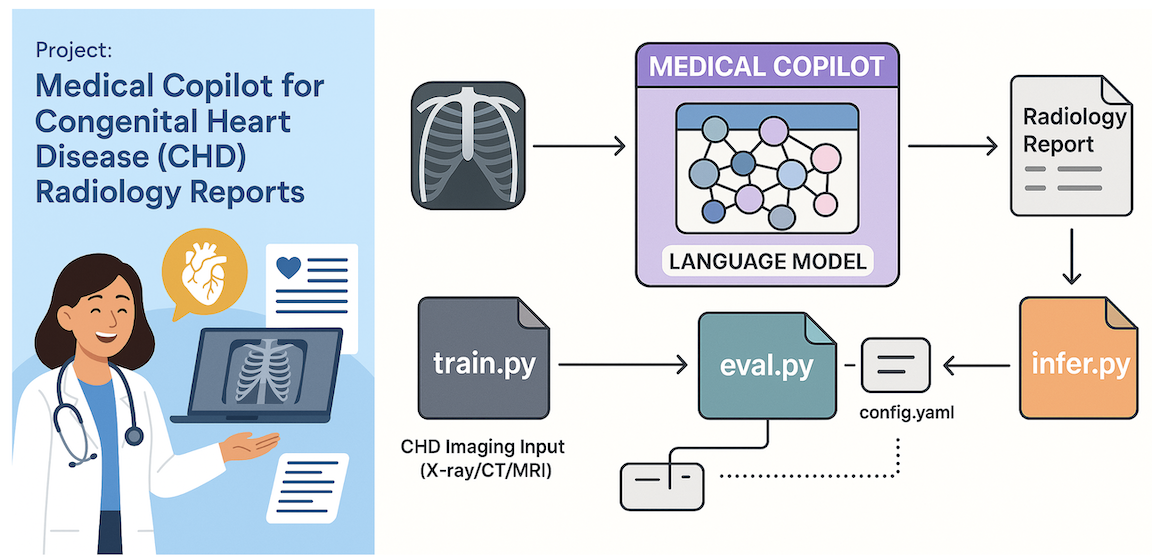

The below sections give you a complete example of how to think through and define a project from both a conceptual and technical perspective. The first part presents a high-level project plan—outlining the problem, objectives, inputs and outputs, datasets, development phases, evaluation strategies, and expected deliverables. This is meant to help you understand how to structure and communicate a project idea clearly and comprehensively. The second part provides a modular base code structure, showing how to set up dataset loading, model fine-tuning, evaluation, and inference. Together, these sections illustrate how to move from an abstract idea to a practical implementation. I encourage you to use this as a reference when designing and documenting your own projects.

# Project: Medical Copilot for Congenital Heart Disease (CHD) Radiology Reports

## 🔹 Project Title
**AI Medical Copilot: Automatic Radiology Report Generation for Congenital Heart Disease (CHD)**

## 🔹 Project Overview
Develop a Vision-Language model (like BLIP-2) fine-tuned on a dataset of radiology images and expert-written clinical reports to automatically generate professional radiology reports for CHD patients.

## 🔹 Objective
- Build an AI system that can view a chest X-ray, CT, or MRI scan and generate a complete radiology report.
- Focus on Congenital Heart Disease (VSD, ASD, Tetralogy of Fallot, etc.).
- Evaluate output quality using both automatic metrics and manual expert review.

## 🔹 Input & Output
- **Input:** Radiology image (X-ray, CT, MRI).
- **Output:** Structured radiology report (Findings, Impression).

## 🔹 Dataset
- **Images:** 1000 radiology images (standardized format).
- **Reports:** 1000 corresponding ground-truth clinical radiology reports.

## 🔹 Step-by-Step Development Plan

### 🔹 Phase 1: Dataset Preparation
- Organize images and reports (image_path -> report_text mapping).
- Resize images to 224x224 or 512x512.
- Normalize pixel values.
- Create train/validation/test split (80/10/10).

### 🔹 Phase 2: Model Selection
- Start with **Salesforce BLIP-2 OPT-2.7b** or **BLIP-1** for lighter versions.
- Later optionally move to medical-specific models (BioMedCLIP, Clinical-BLIP).

### 🔹 Phase 3: Preprocessing
- Use Huggingface `Blip2Processor` to process (image + text) pairs.
- Tokenize reports using the model's tokenizer.

### 🔹 Phase 4: Fine-tuning
- Fine-tune the pre-trained model on CHD data.
- Use Huggingface Trainer API.
- Training hyperparameters:
  - Batch size: 8-16
  - Learning rate: 5e-5
  - Epochs: 10-20
  - Optimizer: AdamW
  - Use mixed precision (fp16).

### 🔹 Phase 5: Evaluation
- Automatic Metrics:
  - BLEU-4
  - ROUGE-L
  - METEOR
  - BERTScore
- Manual Evaluation:
  - Compare real vs generated reports side-by-side.
  - Clinical correctness review by medical expert.

### 🔹 Phase 6: Inference and Deployment
- Build a simple **Gradio App**:
  - Upload radiology image.
  - Generate and display the report.
- Optional: Streamlit web app for more advanced interface.

### 🔹 Phase 7: Challenges and Future Improvements
- Fine-tune better on specific CHD terms (e.g., "ASD", "VSD").
- Explore retrieval-augmented generation (RAG) for enhanced context.
- Expand dataset size beyond 1000 examples.
- Add attention maps visualization (what the model is looking at).

## 🔹 Expected Deliverables
- Fine-tuned AI model.
- Inference script and demo app.
- Evaluation report.
- Presentation slides for results.

## 🔹 Timeline Estimate
| Phase | Duration |
|:------|:---------|
| Dataset preparation | 3 months |
| Model fine-tuning | 2 months |
| Evaluation and testing | 1 month |
| Deployment | 1 month |
| Reporting & documentation | 3 months |


In this section, we set up the base code for building a Medical Copilot designed to generate radiology reports for Congenital Heart Disease (CHD) cases. The code is organized into modular components for dataset loading, model fine-tuning, evaluation, and inference, using a pretrained BLIP model. We will learn how to structure a real-world AI project, prepare medical datasets, fine-tune vision-language models, and build tools for automated medical report generation. This foundation is scalable, allowing future improvements like switching to larger models (e.g., BLIP-2) or adding custom evaluation metrics.

In [ ]:
# 📊 Project: Medical Copilot for CHD - Base Code Starter

# Directory structure:
# /dataset.py
# /train.py
# /eval.py
# /infer.py
# /config.yaml

# First, let's define dataset loading

# ---------------------------
# dataset.py
# ---------------------------

import os
import pandas as pd
from datasets import Dataset
from PIL import Image
from torchvision import transforms

class CHDDataset:
    def __init__(self, csv_path, image_folder):
        self.data = pd.read_csv(csv_path)
        self.image_folder = image_folder
        self.transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.5], std=[0.5])
        ])

    def load_dataset(self):
        def process_row(row):
            image_path = os.path.join(self.image_folder, row['image_path'])
            image = Image.open(image_path).convert('RGB')
            image = self.transform(image)
            return {"pixel_values": image, "text": row['report_text']}

        dataset_dict = self.data.apply(process_row, axis=1).tolist()
        return Dataset.from_list(dataset_dict)


# ---------------------------
# train.py
# ---------------------------

import torch
from transformers import BlipProcessor, BlipForConditionalGeneration, Trainer, TrainingArguments
from dataset import CHDDataset

# Load dataset
train_dataset = CHDDataset('train.csv', 'train_images').load_dataset()

# Load model and processor
model_name = "Salesforce/blip-image-captioning-base"
processor = BlipProcessor.from_pretrained(model_name)
model = BlipForConditionalGeneration.from_pretrained(model_name)

# Preprocessing function
def preprocess(batch):
    inputs = processor(images=batch['pixel_values'], text=batch['text'], padding='max_length', truncation=True, return_tensors="pt")
    inputs['labels'] = inputs.input_ids
    return inputs

train_dataset = train_dataset.map(preprocess, batched=True, remove_columns=['pixel_values', 'text'])

# Define training args
training_args = TrainingArguments(
    output_dir="./checkpoints",
    evaluation_strategy="steps",
    eval_steps=500,
    per_device_train_batch_size=8,
    num_train_epochs=5,
    save_steps=500,
    save_total_limit=2,
    fp16=True,
    logging_steps=100,
    report_to="none"
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
)

trainer.train()

# Save model
model.save_pretrained("./final_model")
processor.save_pretrained("./final_model")


# ---------------------------
# eval.py
# ---------------------------

from transformers import pipeline

def evaluate_model(model_path, test_csv, test_images_folder):
    pipe = pipeline("image-to-text", model=model_path)
    test_data = pd.read_csv(test_csv)

    for idx, row in test_data.iterrows():
        image_path = os.path.join(test_images_folder, row['image_path'])
        report = pipe(Image.open(image_path).convert('RGB'))
        print(f"True report: {row['report_text']}")
        print(f"Generated report: {report}")


# ---------------------------
# infer.py
# ---------------------------

from transformers import BlipProcessor, BlipForConditionalGeneration

def infer_single_image(image_path, model_dir="./final_model"):
    processor = BlipProcessor.from_pretrained(model_dir)
    model = BlipForConditionalGeneration.from_pretrained(model_dir)
    model.eval()

    image = Image.open(image_path).convert('RGB')
    inputs = processor(images=image, return_tensors="pt")

    with torch.no_grad():
        outputs = model.generate(**inputs, max_length=512, num_beams=5)

    generated_text = processor.decode(outputs[0], skip_special_tokens=True)
    print("\nGenerated Radiology Report:\n")
    print(generated_text)


# ---------------------------
# config.yaml (optional)
# ---------------------------

batch_size: 8
epochs: 5
learning_rate: 5e-5
model_checkpoint: "Salesforce/blip-image-captioning-base"


# ---------------------------
# Notes:
# ---------------------------
# 1. This structure is modular: dataset loading, training, evaluation, inference are separated.
# 2. Easy to extend: You can swap BLIP with BLIP-2 easily later.
# 3. Evaluation is simple; could later integrate BLEU/ROUGE metrics.
# 4. Gradio app can be built on top of `infer.py` easily.

# Now you're ready to start coding your CHD Medical Copilot!